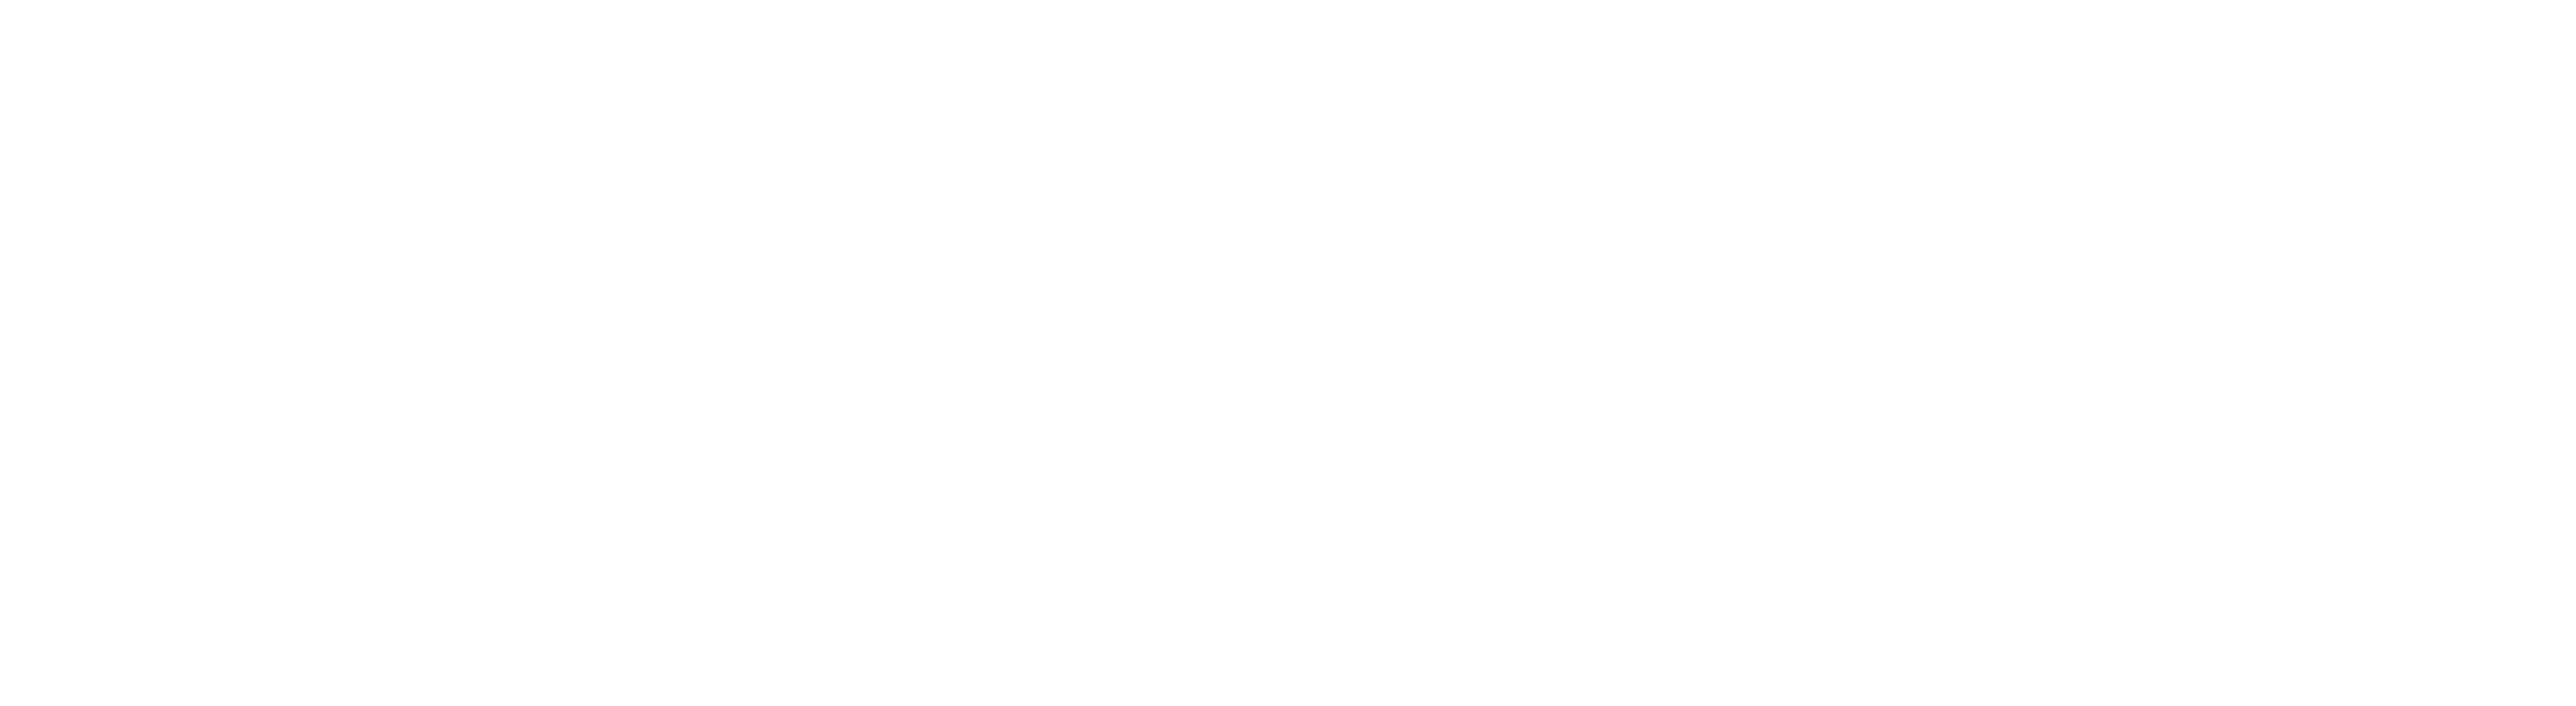

#  Introducción
**from scratch to charts**

> *desde la concepción de una obra musical al éxito en plataformas digitales*



## Abstract

La industria musical enfrenta desde su génesis el desafío de predecir qué canciones resonarán con el público. Siendo que la estructura de una canción juega un papel fundamental en su percepción por parte del oyente, este proyecto busca explorar si existe una correlación entre las características propias de la morfología de una obra musical y su popularidad en plataformas digitales.

En este sentido, Spotify se ha convertido en el estándar de facto para el consumo de música en streaming, influyendo en la forma en que descubrimos, escuchamos y compartimos música. Al analizar los datos que proporciona Spotify desde su API, podemos obtener una visión muy precisa de lo que es popular en la música y cómo evolucionan las tendencias a lo largo del tiempo.

A través del análisis de datos se identificarán patrones en características tales como la duración, sonoridad, tempo, tonalidad y estructura que podrían predecir el éxito de una canción.
Utilizando técnicas de machine learning, se desarrollará un modelo capaz de relacionar el éxito de una canción en función de su composición musical.





---



### Motivación
Las primeras preguntas que se suscitan y originan este estudio son:
* ¿Cómo interactúan diferentes variables (por ejemplo, tempo y tonalidad) para influir en la popularidad?
* ¿Cuáles son las características acústicas y estructurales que más influyen en la popularidad de una canción en Spotify?
* Siendo que el orden en el que se ditribuyen las canciones en un álbum pueden obedecer tanto criterios estético-conceptuales como también deciciones de mercado, ¿Existe una relación entre la posición de una canción dentro de un álbum y su nivel de popularidad?
* ¿Existen diferencias significativas en la popularidad entre las canciones en modo mayor y menor?
* ¿Cuál es el rango de tempo ideal para lograr una mayor popularidad en diferentes géneros musicales?
* ¿Cuál es el número óptimo de segmentos por canción para maximizar la atención del oyente?
¿Cómo afecta el uso de fade-out a la percepción y popularidad de una canción? ¿Existe una duración "sana" de este recurso?
* ¿Cómo han evolucionado las preferencias de los oyentes a lo largo del tiempo?
* ¿Existen diferencias culturales en las preferencias musicales?

Y tal vez la más importante, la que todo artista teme saber y todo productor anhela responder:
* **¿Existe una combinación ideal de características que maximice la popularidad?**

### Hipótesis específicas

* Las canciones con un tempo medio tienden a ser más populares que aquellas de ritmos muy rápidos o muy lentos.

* Las canciones en tonalidades mayores son percibidas como más alegres y positivas, lo que podría correlacionarse con una mayor popularidad.

* Las canciones con un número óptimo de segmentos (ni demasiados ni muy pocos) son más atractivas para los oyentes.

* Las canciones que ocupan las primeras o últimas posiciones en un álbum tienen mayores probabilidades de ser escuchadas y, por lo tanto, de ser más populares.

* El uso de fade out como artificio barato y poco expresivo es una simplificación excesivamente fácil de terminar una canción sin ningún tipo de esfuerzo creativo. Esta técnica se ha vuelto un recurso tan común que ha llevado a una homogeneización del sonido, carente de originalidad, privando al oyente de una conclusión satisfactoria y memorable.
Por este motivo hay un público sensible que se siente atraido por obras que concluyan con un decrescendo natural y bien resuelto, propio de la instrumentación.


### Audiencia

Los resultados de este estudio pretenden servir como guía para músicos y productores al momento de crear y lanzar su producción, aportando nuevas perspectivas sobre la relación entre la forma y el contenido en la música popular.

---
## Data Acquisition

Para la elaboración del set de datos que compone este análisis, su utilizan las herramientas para desarrolladores que ofrece Spotify a través de su web API:
https://developer.spotify.com/documentation/web-api

Para obtener un limite de consultas diarias más alto se utilizó la librería Spotipy: https://spotipy.readthedocs.io/

In [ ]:
import pandas as pd
import numpy as np

El porceso de extracción se planificó en tres partes:


1. Crear lista de géneros musicales disponibles en Spotify
2. Crear listas de 50 tracks (límite máximo de enpoint [api.spotify.com/v1/search](https://developer.spotify.com/documentation/web-api/reference/search) ) de cada género musical y año de lanzamiento.
3. Obtener información de catálogo de esos tracks a través del endpoint [api.spotify.com/v1/tracks](https://developer.spotify.com/documentation/web-api/reference/get-several-tracks)
4. Obtener un análisis de audio de bajo nivel de una pista del catálogo via [api.spotify.com/v1/audio-analysis/{id}](https://developer.spotify.com/documentation/web-api/reference/get-audio-analysis)

Más detalles sobre el proceso y funciones de extracción en la primera parte de este desarrollo:

https://github.com/vierbo/Data-Science/blob/main/from_scratch_to_charts/CH_DS2_preentrega_%2B_Boviez.ipynb

#### 50_spotify_tracks_by_year_and_genre

In [ ]:
file_tracks_by_year_genre = "https://raw.githubusercontent.com/vierbo/Data-Science/refs/heads/main/from_scratch_to_charts/50_spotify_tracks_by_year_and_genre_1900-2024.csv"
df_tracks_by_year_genre = pd.read_csv(file_tracks_by_year_genre)

#### spotify_track_data


In [ ]:
file_track_data = "https://raw.githubusercontent.com/vierbo/Data-Science/refs/heads/main/from_scratch_to_charts/spotify_track_data.csv"
df_track_data = pd.read_csv(file_track_data)

El segundo dataset que se crea es **spotify_track_data** a partir del endpoint api.spotify.com/v1/tracks para obtener información del catálogo de Spotify para hasta 50 pistas en función de sus ID de Spotify.
Para este proceso se toma como universo de datos a la lista de tracks obtenido en el proceso anterior. Luego se segmenta esta lista en sublistas de hasta 50 elementos que iteraran sobre la función de consulta a la API.

#### spotify_track_analysis

In [ ]:
file_track_analysis = "https://raw.githubusercontent.com/vierbo/Data-Science/refs/heads/main/from_scratch_to_charts/spotify_track_analysis.csv"
df_track_analysis = pd.read_csv(file_track_analysis)

Y así finalmemnte tenemos dimensión del conjunto de datos disponibles que se ha podido extraer:

In [ ]:
print( "tracks_by_year_genre: " +str(df_tracks_by_year_genre.shape) + ". Tracks únicos: " +str(df_tracks_by_year_genre['id_track'].nunique()))
print( "track_data: " +str(df_track_data.shape) + ". Tracks únicos: " +str(df_track_data['id_track'].nunique()))
print( "track_analysis: " +str(df_track_analysis.shape) + ". Tracks únicos: " +str(df_track_analysis['id_track'].nunique()))

tracks_by_year_genre: (339993, 6). Tracks únicos: 218127
track_data: (221227, 8). Tracks únicos: 218127
track_analysis: (143463, 18). Tracks únicos: 143463


Durante el tiempo que llevó la constucción de este último dataset se ha completado el proceso para mas de 140.000 pistas musicales.

Dicho proceso se ha visto interrumpido por la discontinuidad de varios de los servicios de la API de spotify, entre ellos el que se estaba utilizando para la ultima fase de esta parte del proyecto.

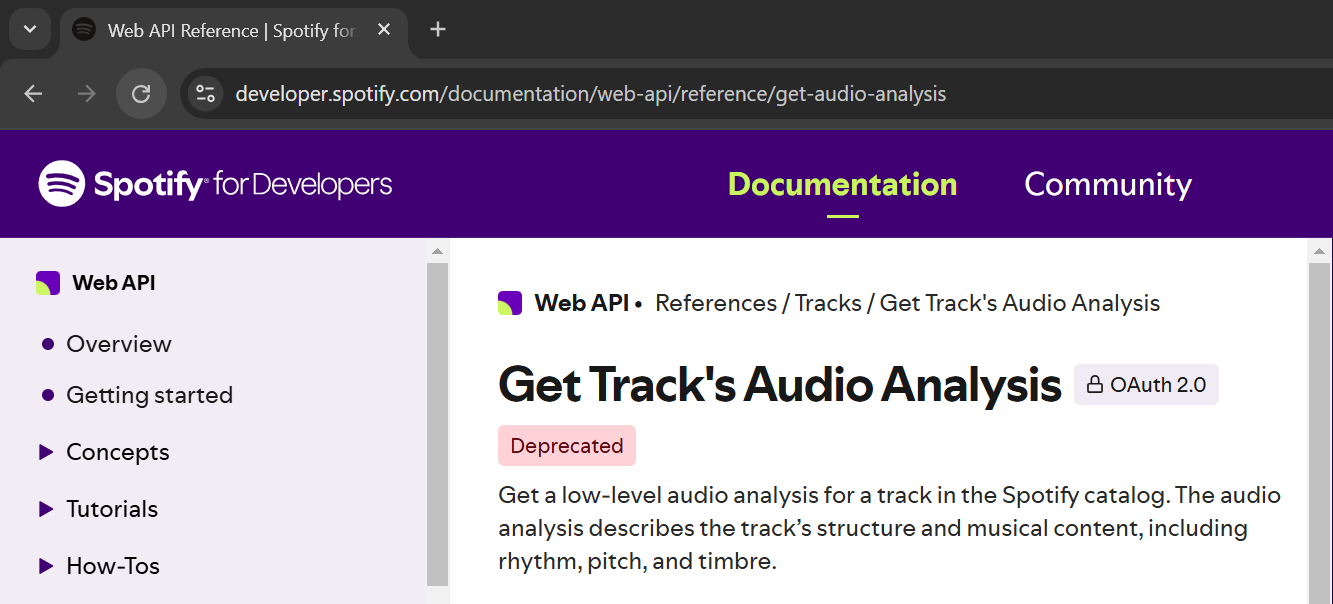

#### integración de datos

Ya con los tres datasets disponibles, comienza el porceso de fusionarlos en una sola fuente de datos.

In [ ]:
primary_merged_df = df_tracks_by_year_genre.merge(df_track_data, on='id_track', how='inner')
primary_merged_df = primary_merged_df.drop_duplicates().reset_index(drop=True)
primary_merged_df.shape

(284773, 13)

In [ ]:
secondary_merged_df = primary_merged_df.merge(df_track_analysis, on='id_track', how='inner')
secondary_merged_df = secondary_merged_df.drop_duplicates().reset_index(drop=True)
secondary_merged_df.shape

(185457, 30)

In [ ]:
secondary_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185457 entries, 0 to 185456
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   artista                    185455 non-null  object 
 1   album                      185451 non-null  object 
 2   cancion                    185457 non-null  object 
 3   id_track                   185457 non-null  object 
 4   fecha_lanzamiento          185457 non-null  object 
 5   genero                     185457 non-null  object 
 6   duration_ms                185457 non-null  int64  
 7   explicit                   185457 non-null  bool   
 8   popularity                 185457 non-null  int64  
 9   disc_number                185457 non-null  int64  
 10  track_number               185457 non-null  int64  
 11  preview_url                147979 non-null  object 
 12  Spotify_URI                185457 non-null  object 
 13  duration_sec               18

In [ ]:
df = secondary_merged_df.copy()
# se mantiene vigente una copia del primer join de tablas que contine mayor cantidad de rigistros únicos para realizar otros análisis secundarios.
df_0 =primary_merged_df.copy()

In [ ]:
# guardar una copia del dataset las transformaciones aplicadas hasta acá
df.to_csv("datasetMerged-newFeatures.csv", index=False) # A partir de ahora trabajaremos con este archivo

---
# Breakpoint #1

In [93]:
# Por practicidad se generó un dataset parcial que integra los resultados obtenidos hasta este punto.
# Podemos comenzar el proceso a partir de acá:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/vierbo/Data-Science/refs/heads/main/from_scratch_to_charts/datasetMerged-newFeatures.csv")
df.shape

(185457, 37)

In [86]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data Transformation

#### descripción de variables

Antes de continuar, es momento de describir cada una de las variables disponibles:

* **artista**: Nombre del interprete al que se le atribuye la autoría de la obra.
* **album**: Nombre de la producción artística o industrial que conglomera y organiza el de canciones de un artista o grupo.
* **cancion**: Nombre de la pieza musical con el que se la reconoce.
* **id_track**: identificación única de la pieza musical o pista. Unidad de medida con la que se trabajará en este proyecto.
* **fecha_lanzamiento**: fecha en la que salió al mercado el sencillo o album del track.
* **genero**: corpus estilístico al que adscribe la pieza musical.
* **duration_ms**: longitud de duración de la pista en milisegundos.
* **explicit**: condición booleana que determina si la pista contiene letras explícitas o no ( true= sí las tiene; false= no o se desconoce).
* **popularity**: La popularidad de una canción es un valor entre 0 y 100, siendo 100 la más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la canción y lo recientes que son esas reproducciones.
* **disc_number**: El número de disco (normalmente 1, a menos que el álbum conste de más de un disco).
* **track_number**: El número de la pista en el orden en el que figura en el disco. Si un álbum tiene varios discos, es el número de la pista en el disco específico.
* **preview_url**: Enlace a una vista previa de 30 segundos (formato MP3) de la pista. Puede ser nulo.
* **Spotify_URI**: Identificador de recurso de la pista. Sirve para introducir en el cuadro de búsqueda de la plataforma de Spotify para navegar directamente hasta ese recurso.
* **duration_sec**: longitud de duración de la pista en segundos.
* **end_of_fade_in**: El tiempo, en segundos, en el que termina el periodo de fundido al inicio de la pista. Si la pista no tiene fundido de entrada, será 0.0.
* **start_of_fade_out**: El tiempo, en segundos, en el que comienza el periodo de desvanecimiento de la pista. Si la pista no tiene fundido de salida, debe coincidir con la duración de la pista.
* **loudness**: La sonoridad general de la pista en decibelios (dB).
* **tempo**: El tempo global estimado de la pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza determinada y se deriva directamente de la duración media de los tiempos.
* **tempo_confidence**: La confianza, de 0,0 a 1,0, de la fiabilidad del tempo. Algunas pistas contienen cambios de tempo o sonidos que no contienen tempo (como las secciones habladas o colchones sonoros), lo que correspondería a un valor bajo en este campo.
* **time_signature**: Tipo de compás estimado. El compás es una convención de notación que especifica cuántos tiempos hay en cada compás. El compás oscila entre 3 y 7, lo que indica compases de «3/4» a «7/4».
* **time_signature_confidence**: La confianza, de 0,0 a 1,0, de la fiabilidad de time_signature. Las pistas con polirritmia o amalgama de compaces pueden corresponder a valores bajos en este campo.
* **key**: Tonalidad estimada de la pista. Los valores de este campo van de 0 a 11 y corresponden a tonos utilizando la notación estándar Pitch Class (por ejemplo, 0 = Do, 1 = Do♯/D♭, 2 = Re, etc.). Si no se detecta ninguna clave, el valor es -1.
* **key_confidence**: Confianza, de 0,0 a 1,0, de la fiabilidad de la tonalidad interpretada.
* **mode**: Indica la modalidad (mayor o menor) de una pista, el tipo de escala del que se deriva su contenido melódico. Mayor se representa con 1 y menor con 0.
* **mode_confidence**¨: Confianza, de 0,0 a 1,0, de la fiabilidad de la modalidad interpretada. Piezas musicales con estructuras armónicas complejas pueden corresponder a un valor bajo en este campo.
* **bars**: Intervalos de tiempo de los compases a lo largo de la pista. Un compás es un segmento de tiempo definido como un número determinado de tiempos. En este conjunto de datos se numeran la cantidad de compaces a lo largo de la pieza musical.
* **beats**: Intervalos de tiempo de los "tiempos" a lo largo de la pista. Un "tiempo" es la unidad temporal básica de una pieza musical; por ejemplo, cada tic de un metrónomo. Los tiempos suelen ser múltiplos de tatums. En este conjunto de datos se numeran la cantidad de tiempos de la pieza musical.
* **sections**: Las secciones se definen por grandes variaciones de ritmo o timbre, por ejemplo, estribillo, estrofa, puente, solo de guitarra, etc. En este conjunto de datos se numeran la cantidad de secciones de la pieza musical.
* **segments**: Cada segmento contiene un sonido aproximadamente constante a lo largo de toda su duración. En este conjunto de datos se numeran la cantidad de segmentos de la pieza musical.
* **tatums**: Un tatum representa el tren de pulsos regular más bajo que un oyente infiere intuitivamente a partir de la sincronización de los eventos musicales percibidos (segmentos). Es la subdivisión cognitivamente significativa más pequeña del ritmo principal y el pulso más rápido presente en una pieza musical. En la notación occidental, los tatums pueden corresponder típicamente a semicorcheas.

##### nuevas variables calculadas

* **release_year**: Año en el que salió al mercado el sencillo o album del track.
* **fade_out_length_sec**: Duración de tiempo en segundos del desvanecimiento del sonido al final de la canción.
* **bar_length_sec**: Duración de tiempo en segundos de un compás.
* **fade_out_length_bars**: Duración de tiempo en compaces del desvanecimiento del sonido al final de la canción.
* **fade_out_ending**: Condición booleana que determina si una pista finaliza en fade out (valor: 1) o no (valor: 0). Si el desvanecimiento dura menos de un vuelta de cuatro compaces, se interpreta que no se resuelve a través de un artificio, sino de manera natural.
* **genre_count**: Recuento de generos a los que adscribe un mismo track.

###### release_year

Al explorar el contenido del dataset encontramos valores heterogeneos en el campo **fecha_lanzamiento**, donde coexisten tanto fechas como números enteros que representan al año de lanzamiento.
En este sentido, se decidió unificar todos los valores por la unidad temporal más grande, es decir, por el año:

In [ ]:
def extract_year(fecha):
    try:
        return pd.to_datetime(fecha).year
    except ValueError:
        return int(fecha)

In [ ]:
# variable que contiene solo el año de lanzamiento
df['release_year'] = df['fecha_lanzamiento'].apply(extract_year)

In [ ]:
# variable que contiene solo el año de lanzamiento
df_0['release_year'] = df_0['fecha_lanzamiento'].apply(extract_year)

###### fade_out_ending

Para avanzar con la hipotesis planteada sobre la incidencia del uso de fade-out en las preferencias del oyente, se crean las siguientes variables:

In [ ]:
# duración del fade out en segundos.
df['fade_out_length_sec'] = df['duration_sec'] - df['start_of_fade_out']

In [ ]:
# duración del compás en segundos
# controlar la división por cero para que no resulte en un valor infinito.
df['bar_length_sec'] = np.where(df['bars'] < 1, 0, df['duration_sec'] / df['bars'])
df['bar_length_sec'] = df['bar_length_sec'].apply(lambda x: max(x, 0))

In [ ]:
df['fade_out_length_bars'] = np.where(df['bar_length_sec'] < 1, 0, df['fade_out_length_sec'] / df['bar_length_sec']) # duración del fade out en compases
df['fade_out_length_bars'] = df['fade_out_length_bars'].apply(lambda x: max(x, 0))

In [ ]:
# Crear una función para determinar si un track termina en fadeout
# considerando la convención de 4 compases para establecer la duración de una frase musical, se establece este limite como parámetro de corte.
def fade_parameter(row):
    if row['fade_out_length_bars'] > 3:
        return True
    else:
        return False

In [ ]:
# booleano que determina si la pista termina en fade out.
df['fade_out_ending'] = df.apply(fade_parameter, axis=1)

E##### genres_count

Esta variable cuenta la cantidad de generos a los que un mismo track adscribe.

In [ ]:
# Agrupar por 'id_track' y contar los géneros únicos.
genres_count = df.groupby('id_track')['genero'].nunique().reset_index(name='genres_count')
# Unir el resultado al DataFrame original
df = df.merge(genres_count, on='id_track', how='left')

###### popularity_bucket

Calculamos los cuartiles de la variable 'popularity' y creamos una nueva columna 'popularity_cat' donde a partir del cuartil en en que se encuentre el valor de popularidad de la canción se reemplace por las categorias:

In [ ]:
#Calculamos el quantil Q3= 0.75
q75 = df["popularity"].quantile(0.75)
print("Valor del cuantil 75: ", q75)

Valor del cuantil 75:  52.0


In [ ]:
#Reemplazamos en el data frame en la nueva columna "popularity_cat"
df.loc[df["popularity"] < q75, 'popularity_bucket'] = False
df.loc[df["popularity"] >= q75, 'popularity_bucket'] = True

### Discretización de variables

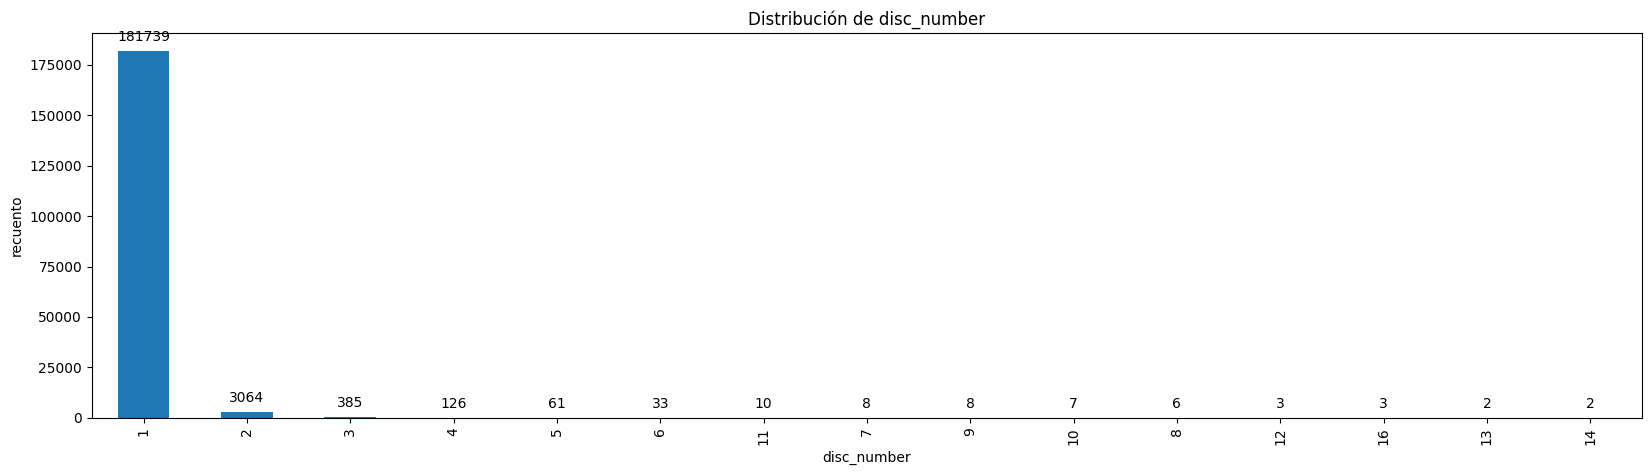

In [4]:
# Contar la frecuencia de cada valor en 'disc_number'
value_counts = df['disc_number'].value_counts()
# mostrar en gráfico de barras
plt.figure(figsize=(20, 5))
ax = value_counts.plot(kind='bar')
# Agregar los valores numéricos al final de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribución de disc_number')
plt.xlabel('disc_number')
plt.ylabel('recuento')
plt.show()

In [5]:
df['disc_number'] = df['disc_number'].apply(lambda x: x if x <= 2 else 3)
df['disc_number'].value_counts()

disc_number
1    181739
2      3064
3       654
Name: count, dtype: int64

In [6]:
df['time_signature'] = pd.Categorical(df['time_signature'], categories=[0, 1, 3, 4, 5], ordered=True)
df['time_signature'] = df['time_signature'].cat.rename_categories(['None', '1/1','3/4', '4/4', '5/4'])

In [7]:
df['key'] = pd.Categorical(df['key'], categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ordered=True)
df['key'] = df['key'].cat.rename_categories(['C', 'C#/Db','D', 'D#/Eb', 'E','F','F#/Gb', 'G', 'G#/Ab','A', 'A#/Bb', 'B'])

In [8]:
df['mode'] = pd.Categorical(df['mode'], categories=[1, 0], ordered=False)
df['mode'] = df['mode'].cat.rename_categories(['major', 'minor'])

### Coerción de tipos

In [9]:
# Redondear valor y convertir a número entero.
transform_int = ['popularity','tempo','duration_sec','end_of_fade_in','start_of_fade_out']
for i in transform_int:
    df[i] = df[i].round().astype(int)

In [10]:
# Converir variable a categorica.
transform_categorical = ['genero', 'explicit','key', 'mode','release_year','fade_out_ending','popularity_bucket']
for i in transform_categorical:
    df[i] = df[i].astype('category')

## Análisis Exploratorio de Datos (EDA)

Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas.

### Análisis Univariado
Resumen de los datos a ser analizados es decir, número de filas/columnas, tipos de variables, etc.
El primer paso para conocer nuestros datos es generar análisis rápidos que den visibilidad de su contenido.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
import warnings

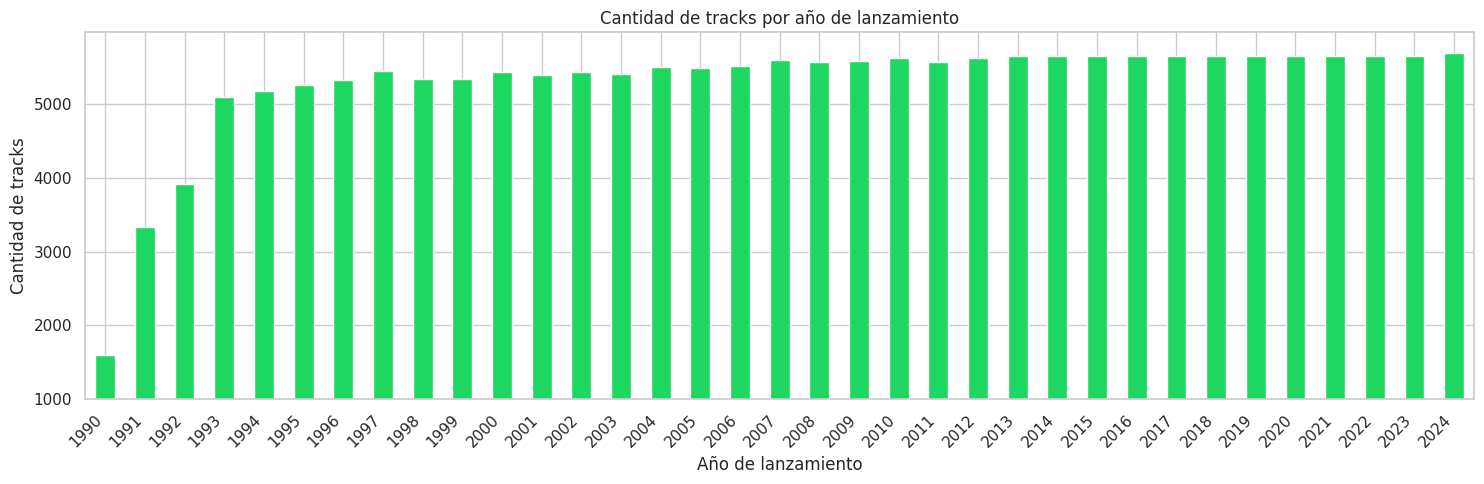

In [87]:
plt.figure(figsize=(15, 5))  # Adjust figure size as needed
df['release_year'].value_counts().sort_index().plot(kind='bar',color='#1ED760')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de tracks')
plt.title('Cantidad de tracks por año de lanzamiento')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.ylim(1000, None)
plt.show()

A pesar de no haber podido completar el proceso de recolección de datos como se mencionó en el apartado de **Data Acquisition*, contamos con una muestra significativa de la música de los últimos 35 años.

In [77]:
numerical_cols = df.select_dtypes(include=['number']).columns

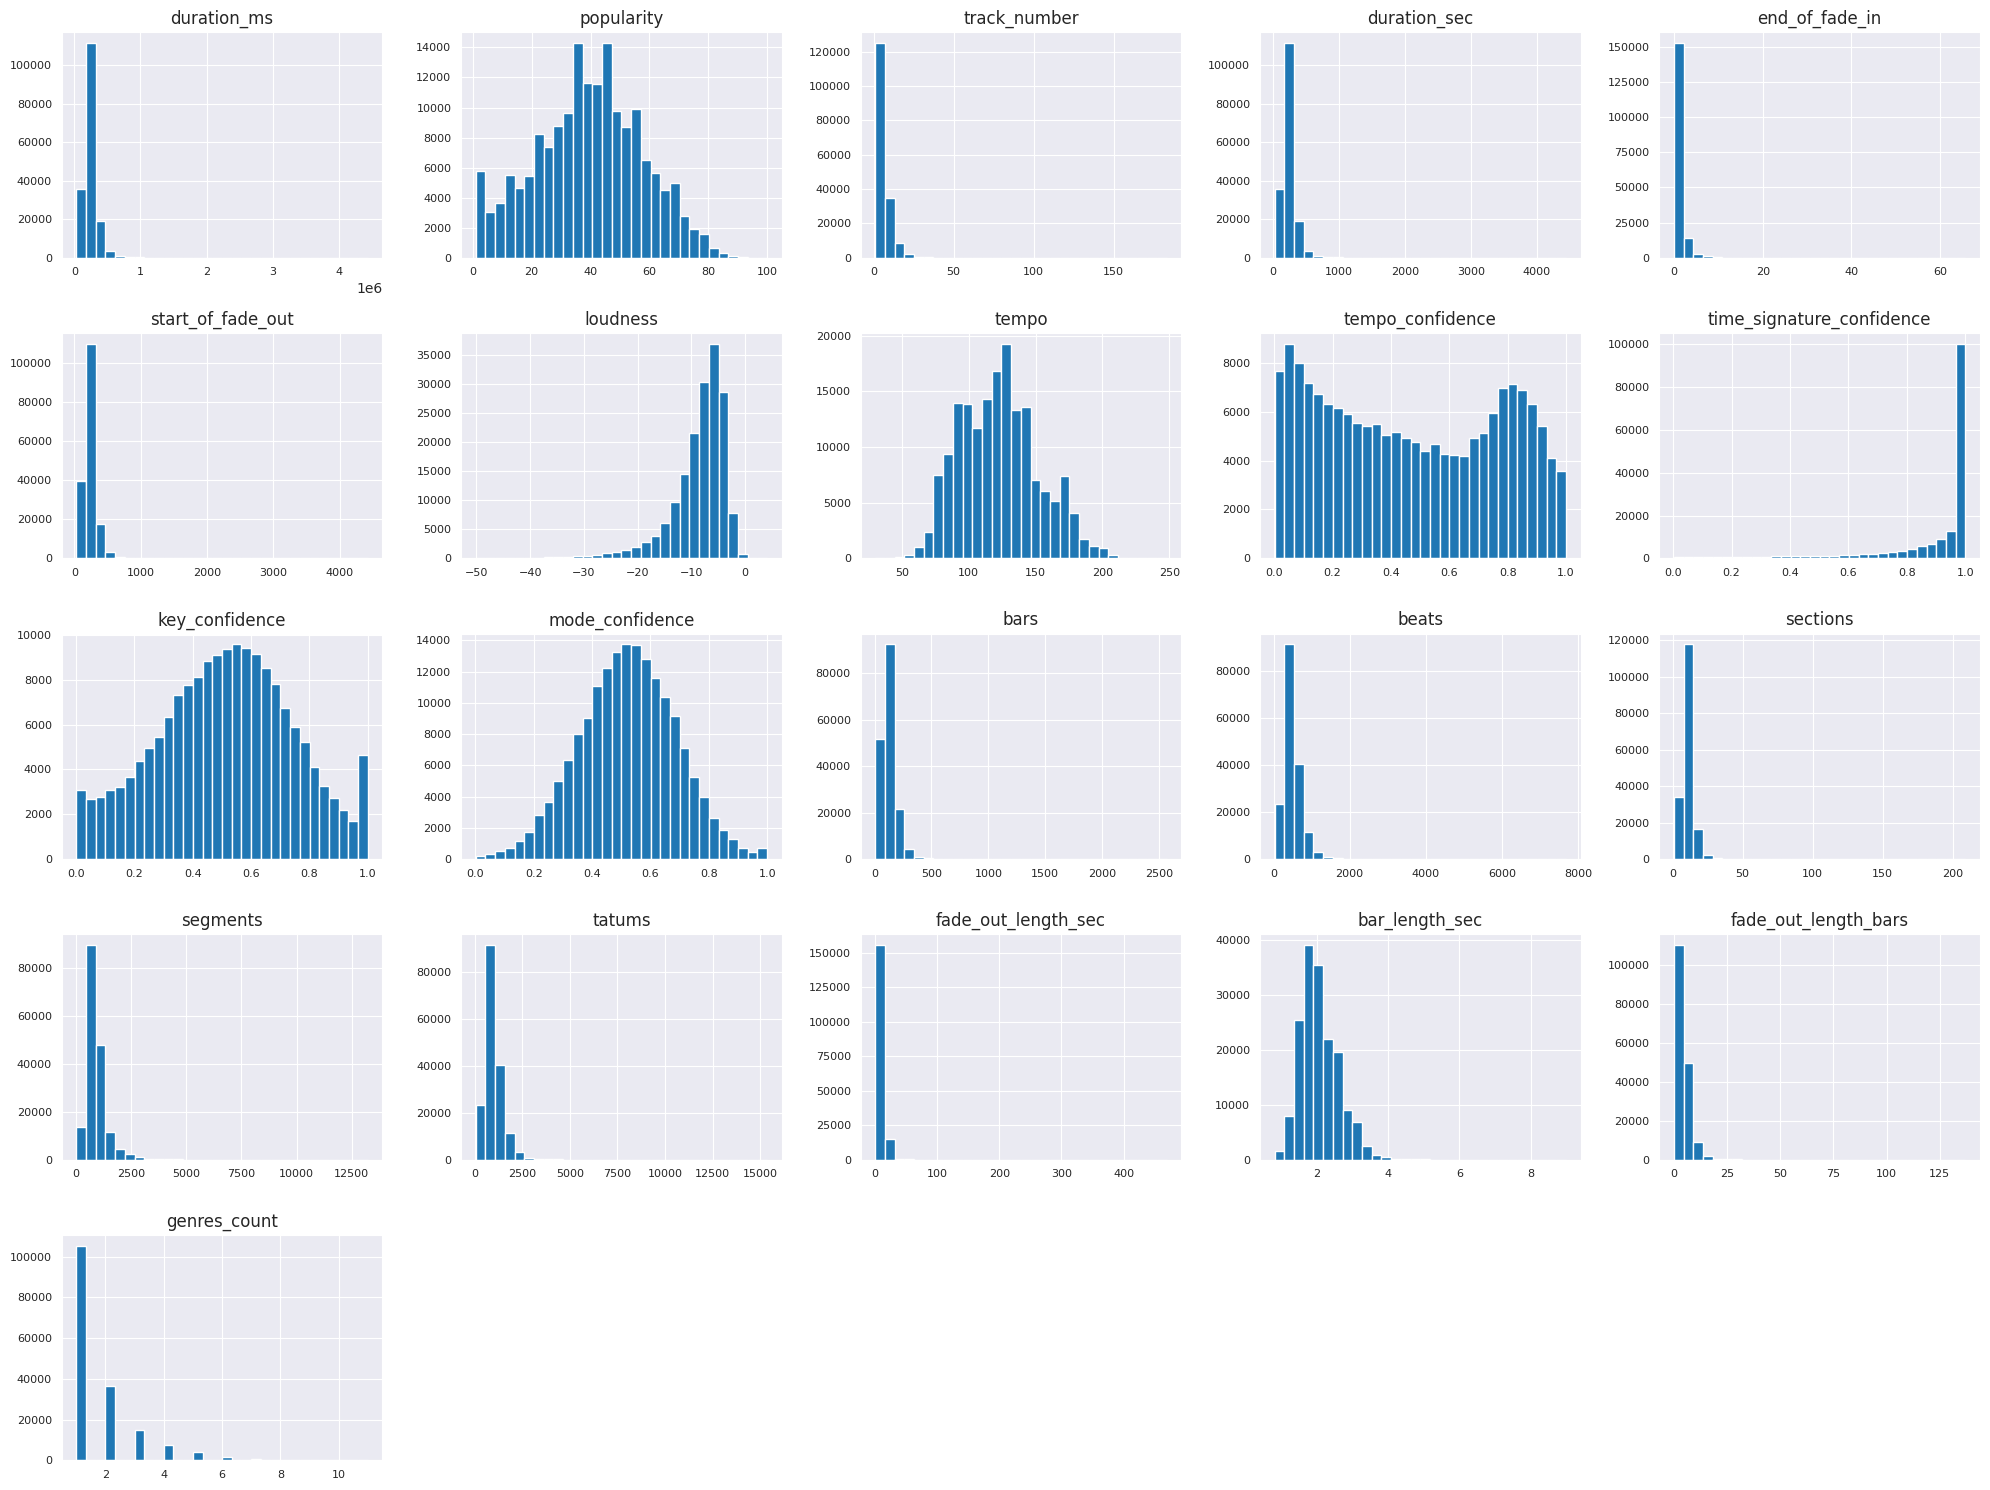

In [ ]:
sns.set_style('darkgrid')
#sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
df[numerical_cols].hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

#### track Number

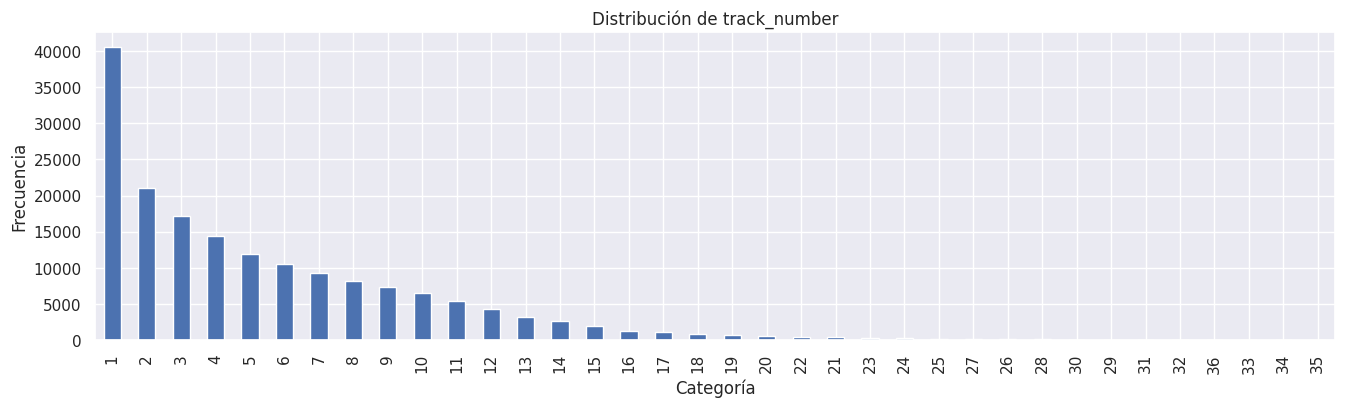

In [78]:
sns.set(rc={'figure.figsize':(16,4)})
df['track_number'].value_counts()[df['track_number'].value_counts() > 10].plot(kind='bar')
plt.title('Distribución de track_number')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
##plt.ylim(0, 50)
plt.show()

Esta variable cuenta con una dispersión muy grande de valores, absolutamen te concentrada, como es esperable, en los rangos más bajos.

(0.0, 1000.0)

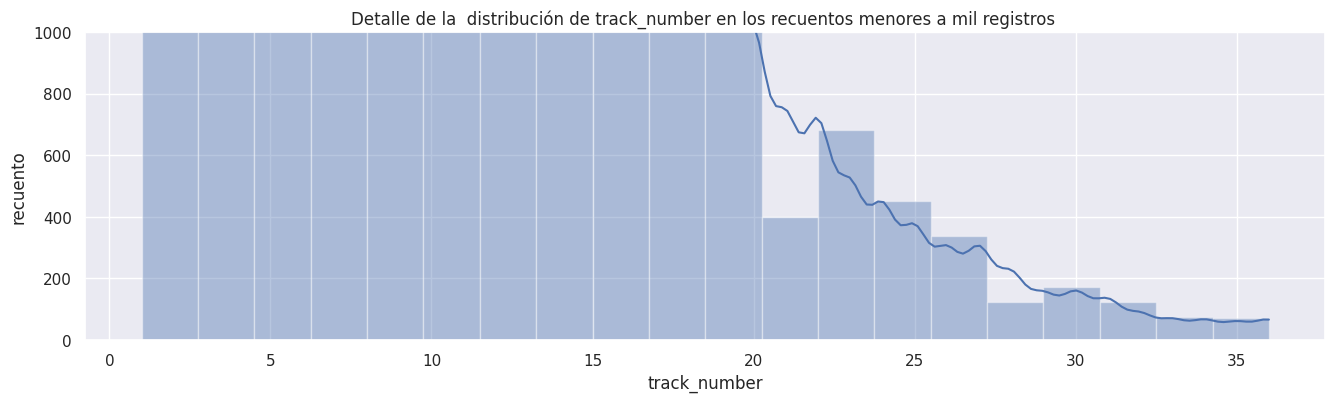

In [80]:
#Histograma
from seaborn import histplot
histplot(df["track_number"], kde=True, bins=20 ,alpha=.4, edgecolor=(1, 1, 1, .4))
plt.title('Detalle de la  distribución de track_number en los recuentos menores a mil registros ')
plt.xlabel('track_number')
plt.ylabel('recuento')
plt.ylim(0, 1000)

Text(0.5, 1.0, 'popularidad promedio por track_number')

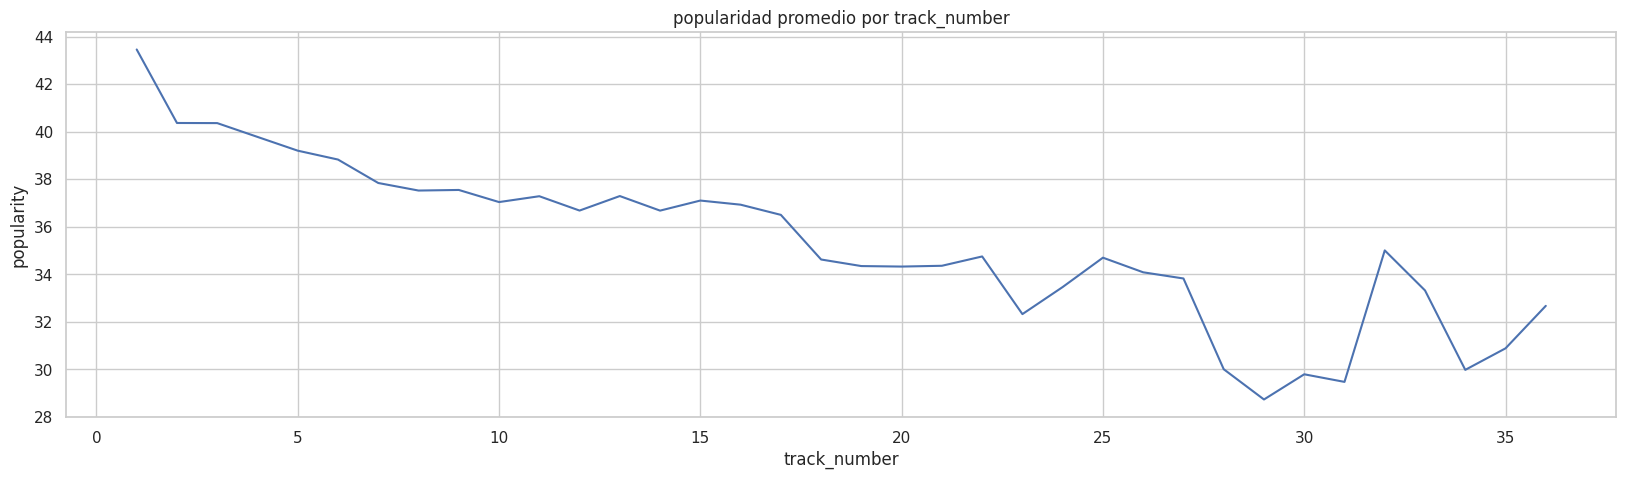

In [81]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
# group by the song's popularity and then get the mean energy
x = df.groupby("track_number")["popularity"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('popularity')
axis.set_xlabel('track_number')
axis.set_title("popularidad promedio por track_number")

Observando que la cantidad de canciones con valores mayores a 40 disminuye notablemente y tienen un comprtamiento herratico en relación a la popularidad, se establece este valor como límite.

In [ ]:
df.loc[df['track_number'] > 40, 'track_number'] = 40

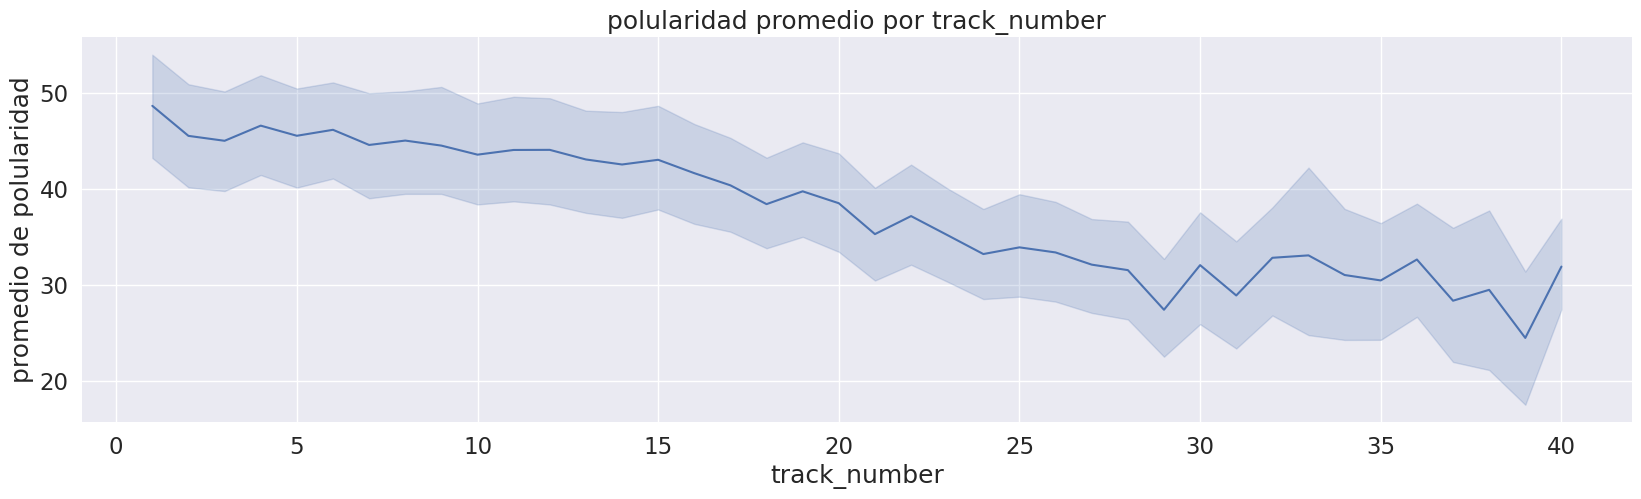

In [ ]:
data = df[['track_number','popularity']].drop_duplicates().copy()
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)
sns.lineplot(data,x='track_number',y='popularity')
plt.xlabel('track_number')
plt.ylabel('promedio de polularidad')
plt.title('polularidad promedio por track_number')
# Get the current Axes object
ax = plt.gca()

# Quitar las espinas (bordes) del gráfico using the Axes object
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Quitar las marcas de los ejes
plt.tick_params(top=False, bottom=False, left=False, right=False)

#### Tempo

Text(0, 0.5, 'recuento')

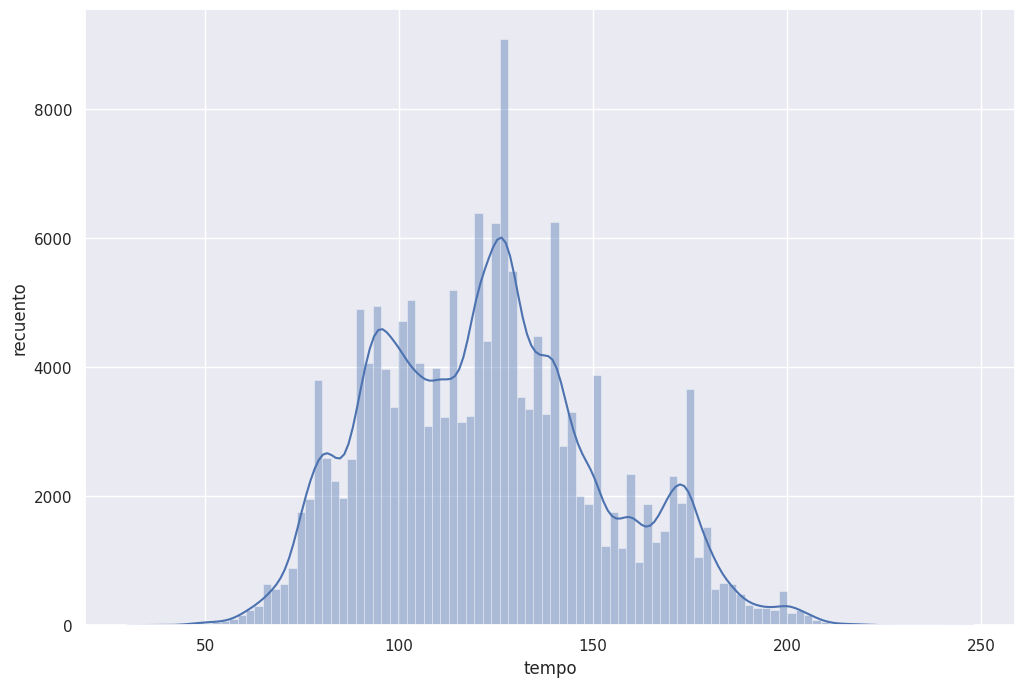

In [ ]:
#Histograma
from seaborn import histplot
histplot(df["tempo"], kde=True, bins=100,alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('tempo')
plt.ylabel('recuento')

#### popularidad

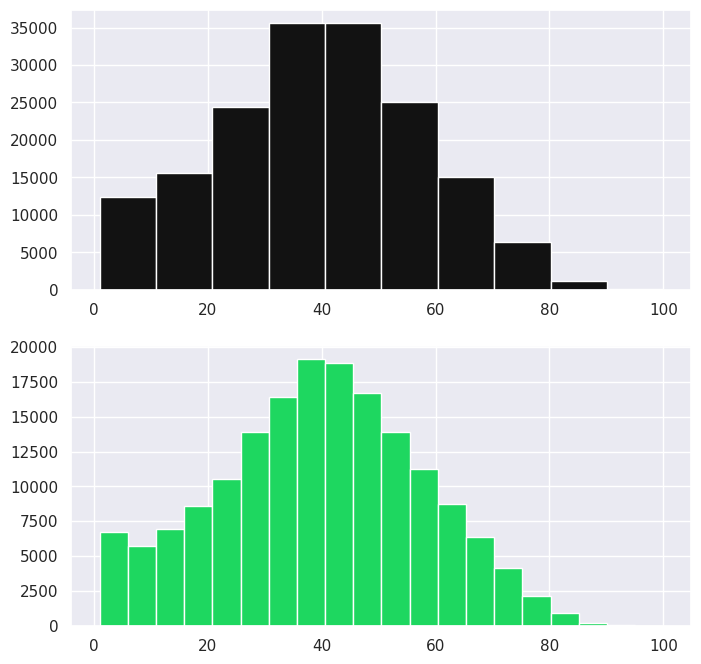

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
plt.subplot(2,1,1)
plt.hist(df.popularity, color= "#121212")
plt.subplot(2,1,2)
plt.hist(df.popularity,bins=20,color='#1ED760');

Text(0, 0.5, 'recuento')

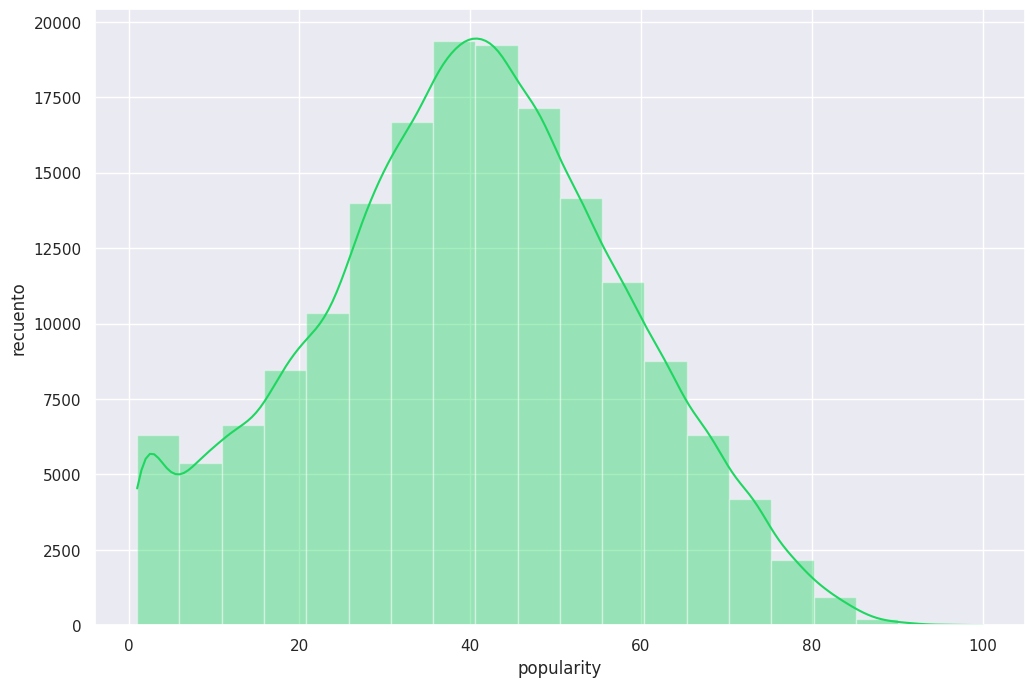

In [106]:
#Histograma
from seaborn import histplot
sns.set(rc={'figure.figsize':(12,8)})
histplot(df["popularity"], kde=True, bins=20,color='#1ED760',alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('popularity')
plt.ylabel('recuento')

#### dispersión de géneros musicales

Estimando que en la creación del dataset un mismo track puede pertenecer a más de un género y por eso el recuento de id_track unicos es menor al total de registros no duplicados, generamos algunas visualizaciones para entender este fenómeno.

In [ ]:
# Agrupar por id_track y concatenar los géneros
df_genre_grouped = df.groupby('id_track')['genero'].apply(lambda x: ', '.join(x)).reset_index()
# Contar las ocurrencias de cada combinación
genre_counts = df_genre_grouped['genero'].value_counts().reset_index(name='count')
# renombrar el campo 'genero' a 'combination'
genre_counts.rename(columns={'genero': 'combination'}, inplace=True)
genre_counts['count_elements'] = genre_counts['combination'].str.split(',').str.len()
genre_counts.columns = ['combination', 'count', 'count_elements'] #adjust column order
# Ordenar por cantidad de ocurrencias
genre_counts_filtered = genre_counts.sort_values('count', ascending=False)
genre_counts_filtered = genre_counts_filtered[genre_counts_filtered['count_elements'] > 1].reset_index(drop=True)
genre_counts_filtered.head(10)

combination  count  count_elements
0     singer-songwriter, songwriter    801               2
1                      dub, dubstep    607               2
2           rock-n-roll, rockabilly    587               2
3  latin, latino, reggae, reggaeton    398               4
4                dancehall, j-dance    380               2
5                  indie-pop, indie    292               2
6                        mpb, samba    275               2
7                    new-age, piano    270               2
8                       kids, party    262               2
9                   punk-rock, punk    255               2

In [ ]:
genre_counts_filtered.to_csv('genre_counts_filtered.csv', index=False)

In [ ]:
# Agrupar por id_track y aplica una función que convierta los géneros asociados a cada id_track en una lista o conjunto.
# Contar el número de géneros por cada id_track y filtra aquellos con más de 3 géneros.
df_grouped = df.groupby('id_track')['genero'].apply(set).reset_index(name='generos')
df_filtered = df_grouped[df_grouped['generos'].apply(len) > 3]

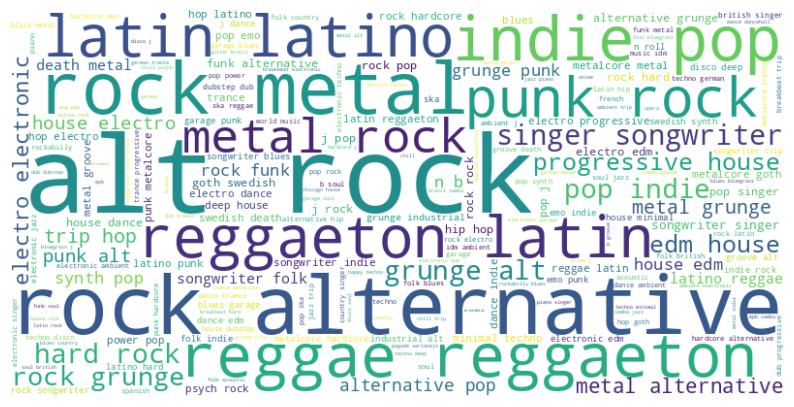

In [ ]:
# Crear una lista de todas las combinaciones de géneros
all_genres = []
for genres in df_filtered['generos']:
    all_genres.extend(list(genres))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_genres))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Se evidencia que las combinaciones pueden ser muy variadas. Por esto se porpone una visualización con los casos de mayor disgregación.

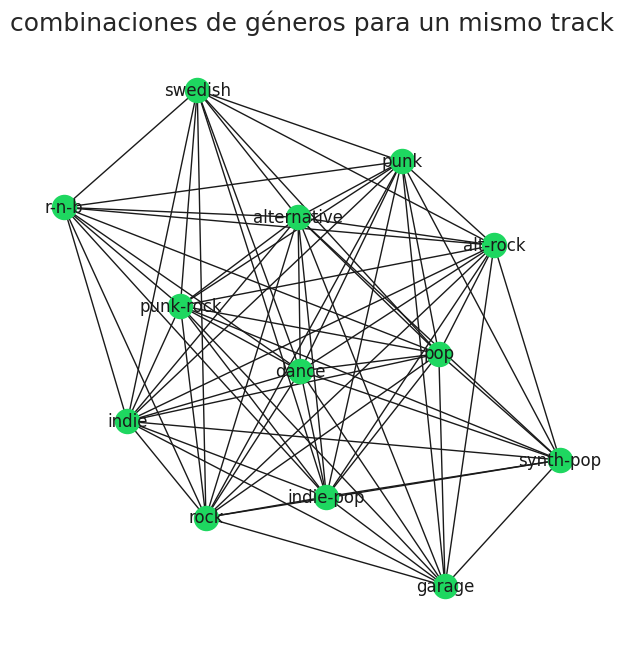

In [ ]:
# Agrupar por id_track y contar géneros
grouped = df.groupby('id_track')['genero'].apply(list).reset_index()
filtered = grouped[grouped['genero'].apply(len) > 10]

node_color = '#1ED760'

# Crear el grafo
G = nx.Graph()
# Agregar nodos y aristas
for _, row in filtered.iterrows():
    genres = row['genero']
    for i in range(len(genres)):
        for j in range(i+1, len(genres)):
            G.add_edge(genres[i], genres[j], weight=1)  # Puedes ajustar el peso

# Visualización
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)  # Puedes probar otros layouts
nx.draw(G, pos, with_labels=True, font_weight='light',node_color=node_color)
edge_labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.title('combinaciones de géneros para un mismo track')
plt.show()

### Análisis Bivariado

#### Artistas más populares

In [ ]:
data = df_0[['release_year','popularity','artista']].drop_duplicates().reset_index(drop=True).copy()
# Agrupar por año y calcular la popularidad promedio por artista
df_grouped = data.groupby(['release_year', 'artista'])['popularity'].mean().reset_index()
# Encontrar el artista más popular por año
df_max_popularity = df_grouped.groupby('release_year')['popularity'].idxmax()
df_result = df_grouped.loc[df_max_popularity]
# Mostrar el resultado
df_result.head(10)

release_year                                            artista  \
54           1900                                      Lisandro Meza   
134          1901                                    Khin Maung Htoo   
142          1902                                      Enrico Caruso   
144          1903                                      Enrico Caruso   
147          1904                                     John McCormack   
167          1905                                         Hồng Nhung   
217          1906  Frank Bridge, Boston Pops Orchestra, Arthur Fi...   
218          1907                         Bloodstone, Donald C Brown   
238          1908                   Robert Schumann, Alfred Grünfeld   
244          1909                      Brendan Grace, Johnny Carroll   

     popularity  
54    45.000000  
134   33.000000  
142    0.000000  
144    9.444444  
147    7.500000  
167   20.666667  
217    0.000000  
218    0.000000  
238    3.000000  
244   18.000000

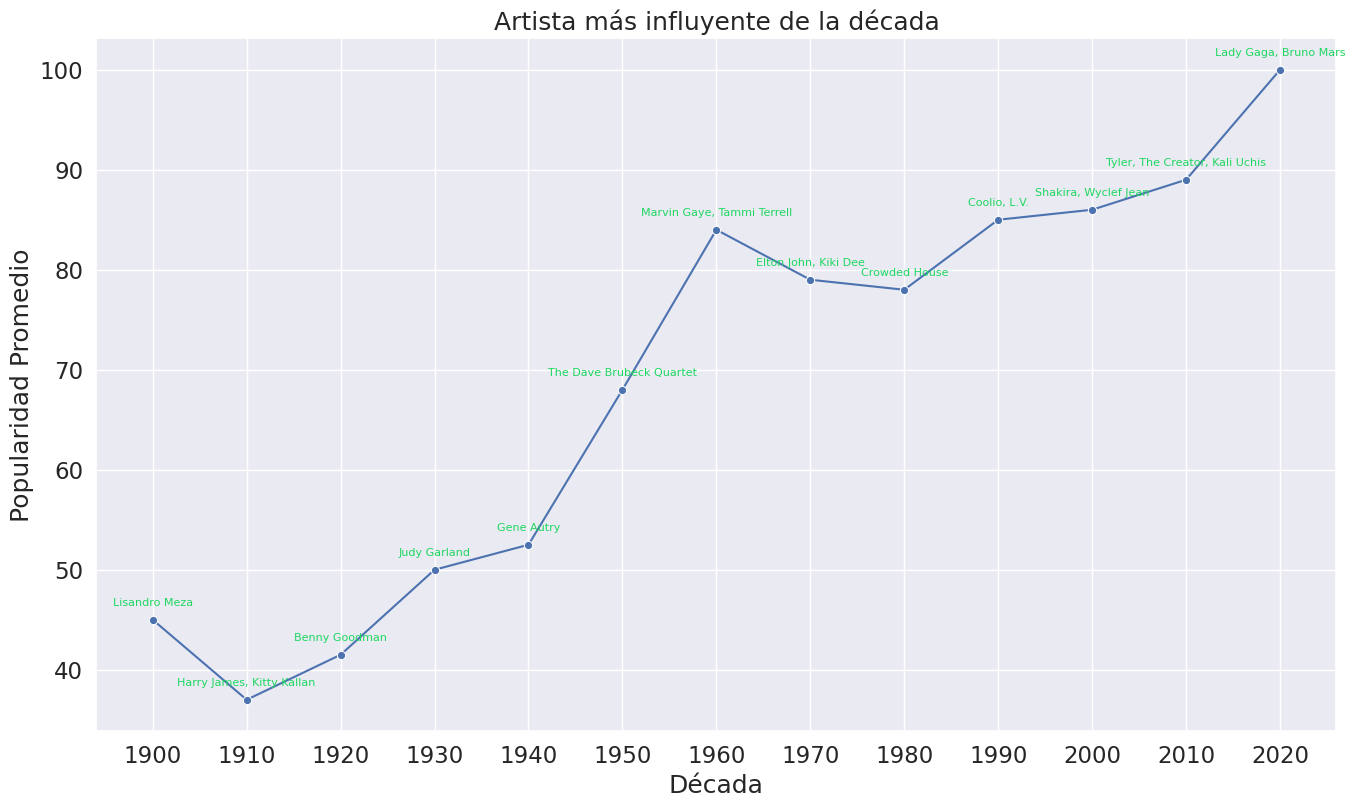

In [ ]:
# Crear una nueva columna 'decade' basada en el año de lanzamiento
 # Agrupar por año y artista, calcular la popularidad promedio
data= df_0[['release_year','popularity','artista']].drop_duplicates().reset_index(drop=True).copy()
data['decade'] = data['release_year'] // 10 * 10

# Agrupar por década y artista, calcular la popularidad promedio
# Changed 'df' to 'df_grouped' to group by 'decade'
data = data.groupby(['decade', 'artista'])['popularity'].mean().reset_index()

# Encontrar el artista más popular por década
df_max_popularity = data.groupby('decade')['popularity'].idxmax()
df_result = data.loc[df_max_popularity]

# Crear el gráfico de líneas
sns.lineplot(x='decade', y='popularity', data=df_result, marker='o')

# Agregar etiquetas con el nombre del artista y la década
for x, y, label in zip(df_result['decade'], df_result['popularity'], df_result['artista']):
    plt.annotate(label, xy=(x, y), textcoords="offset points", xytext=(0,10), ha='center', color='#1ED760', fontweight='light', fontsize=8)

plt.xlabel('Década')
plt.ylabel('Popularidad Promedio')
plt.title('Artista más influyente de la década')
plt.xticks(df_result['decade'])  # Asegurar que se muestren todas las décadas en el eje x
plt.show()

#### popularidad media anual

In [ ]:
df_pop_by_year = df.groupby('release_year')[['popularity']].mean()
##df_pop_by_year.head(30)

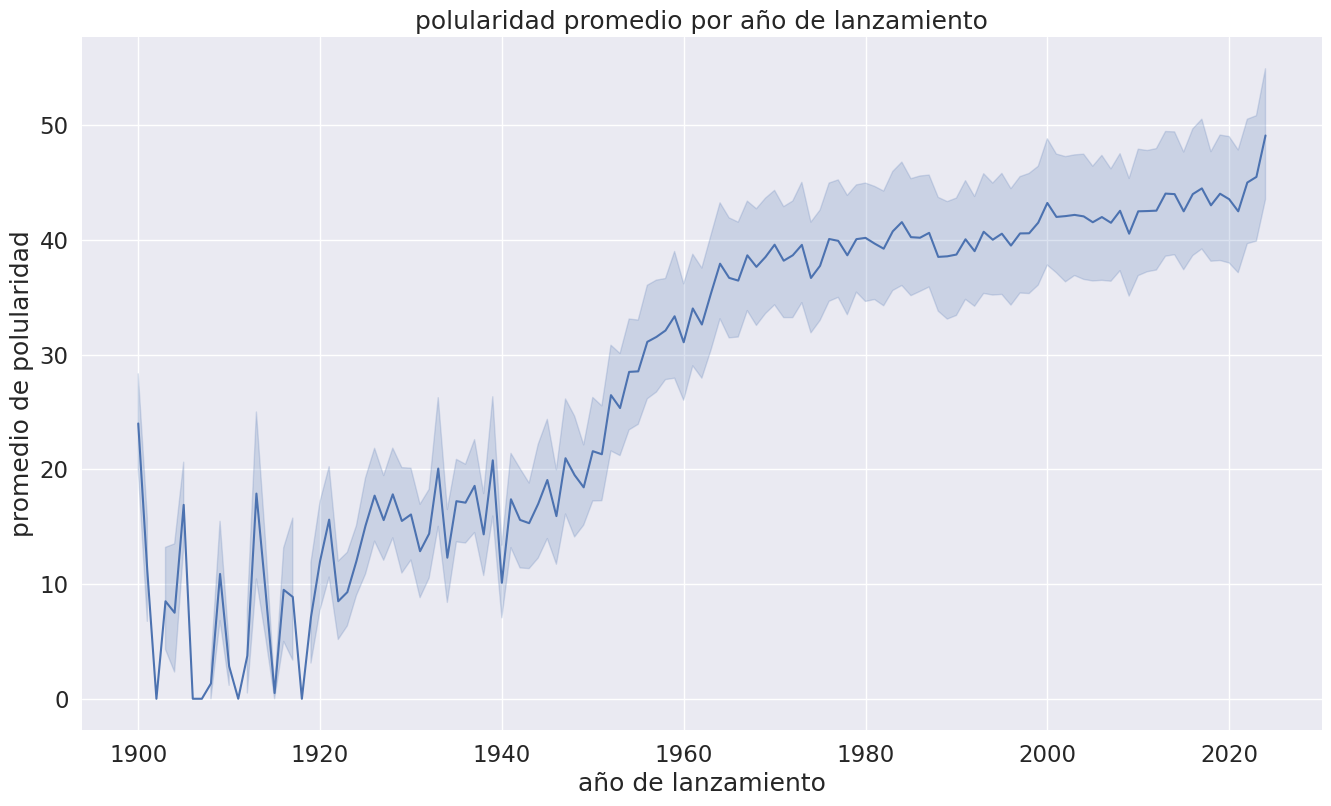

In [ ]:
data = df_0[['release_year','popularity']].drop_duplicates().copy()
sns.set(rc={'figure.figsize':(16,9)})
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)
sns.lineplot(data,x='release_year',y='popularity')
plt.xlabel('año de lanzamiento')
plt.ylabel('promedio de polularidad')
plt.title('polularidad promedio por año de lanzamiento')
# Get the current Axes object
ax = plt.gca()

# Quitar las espinas (bordes) del gráfico using the Axes object
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Quitar las marcas de los ejes
plt.tick_params(top=False, bottom=False, left=False, right=False)

<ipython-input-125-d22bd4c0fef7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby("key")["popularity"].mean().plot(kind='bar',color='#1ED760', width=0.8, capsize=0.1)


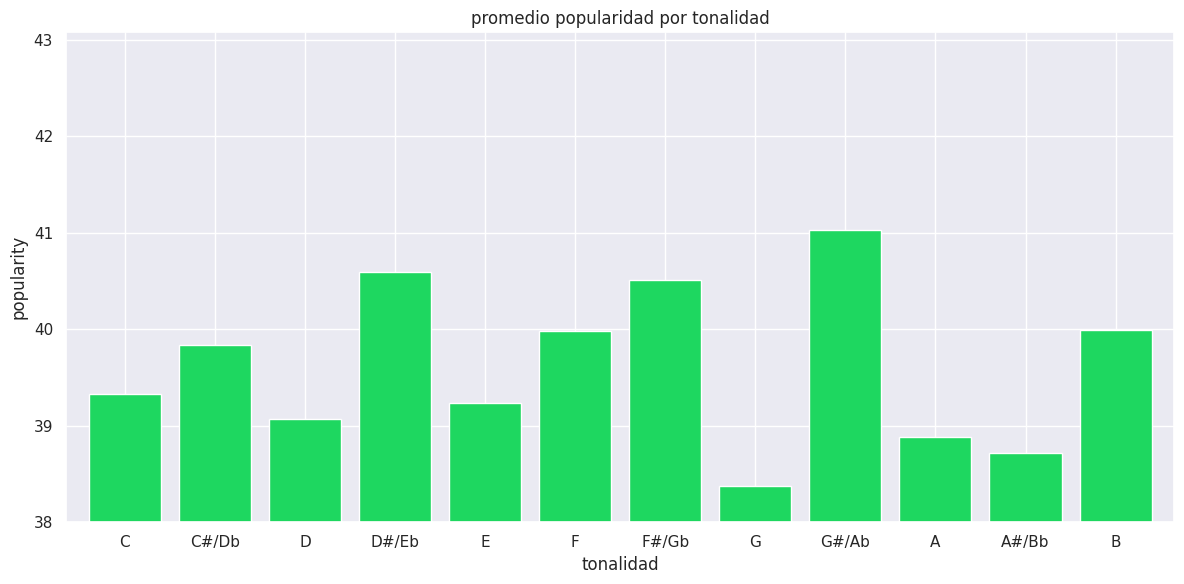

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
# sns.set_style("white")
x = df.groupby("key")["popularity"].mean().plot(kind='bar',color='#1ED760', width=0.8, capsize=0.1)
plt.xlabel('tonalidad')
plt.ylabel('popularity')
plt.title('promedio popularidad por tonalidad')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.ylim(38, None)
plt.show()

Buscando sesgos en la populadidad debido a variables formales propias del proceso de composición.

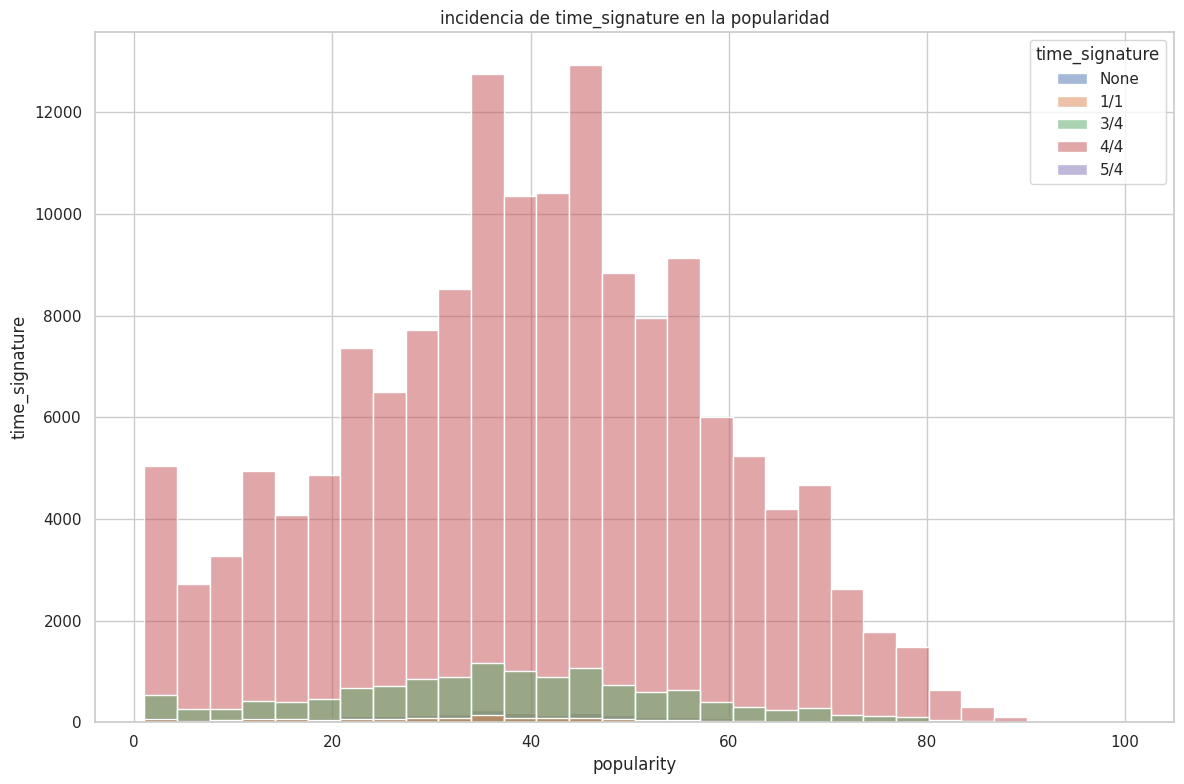

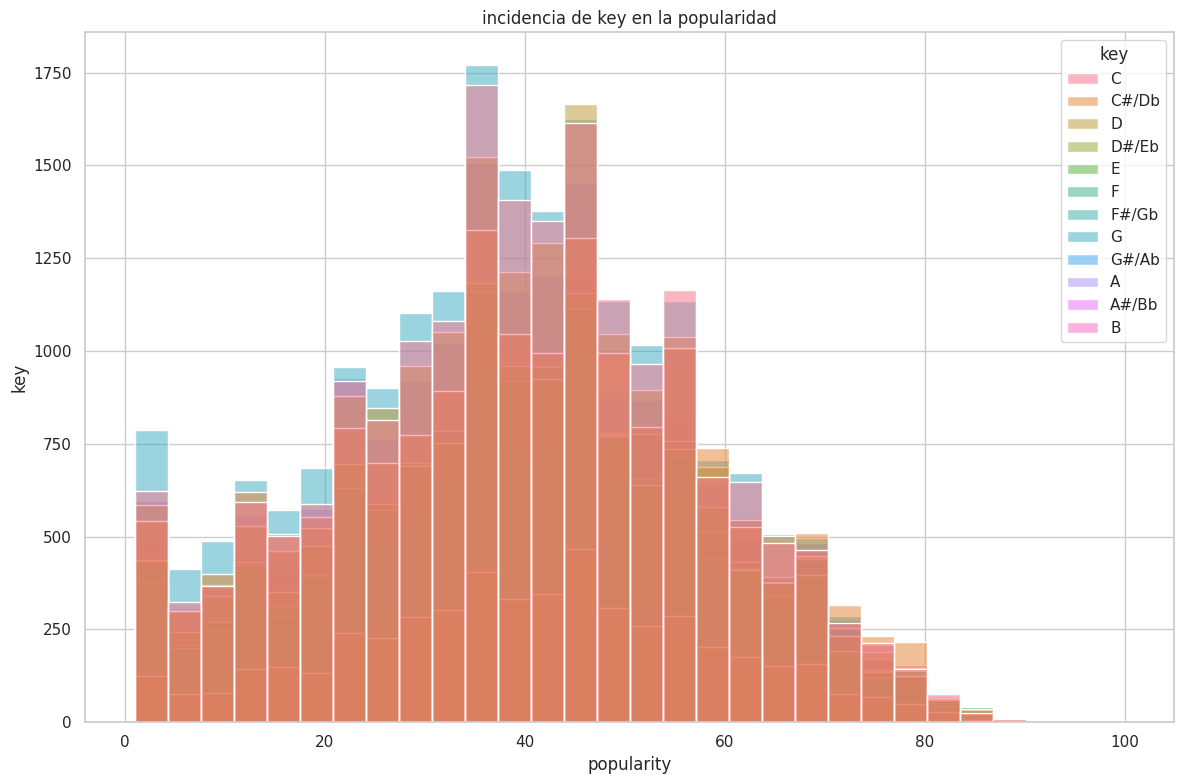

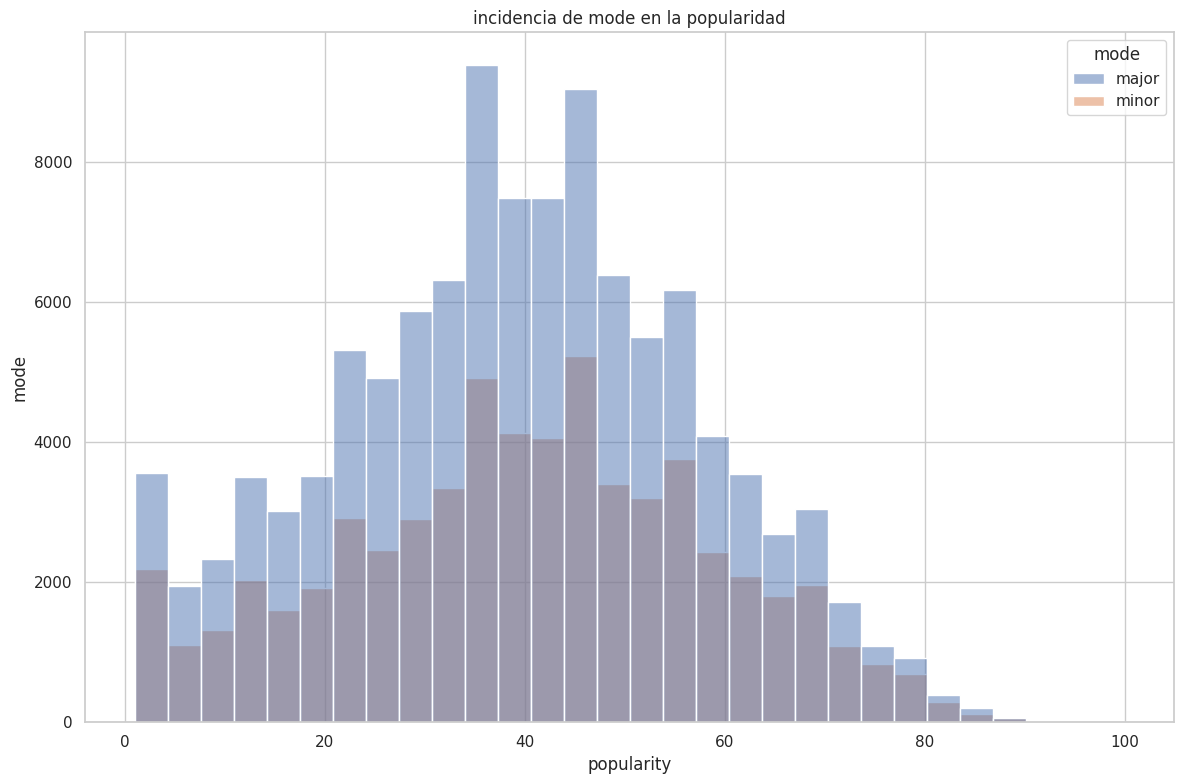

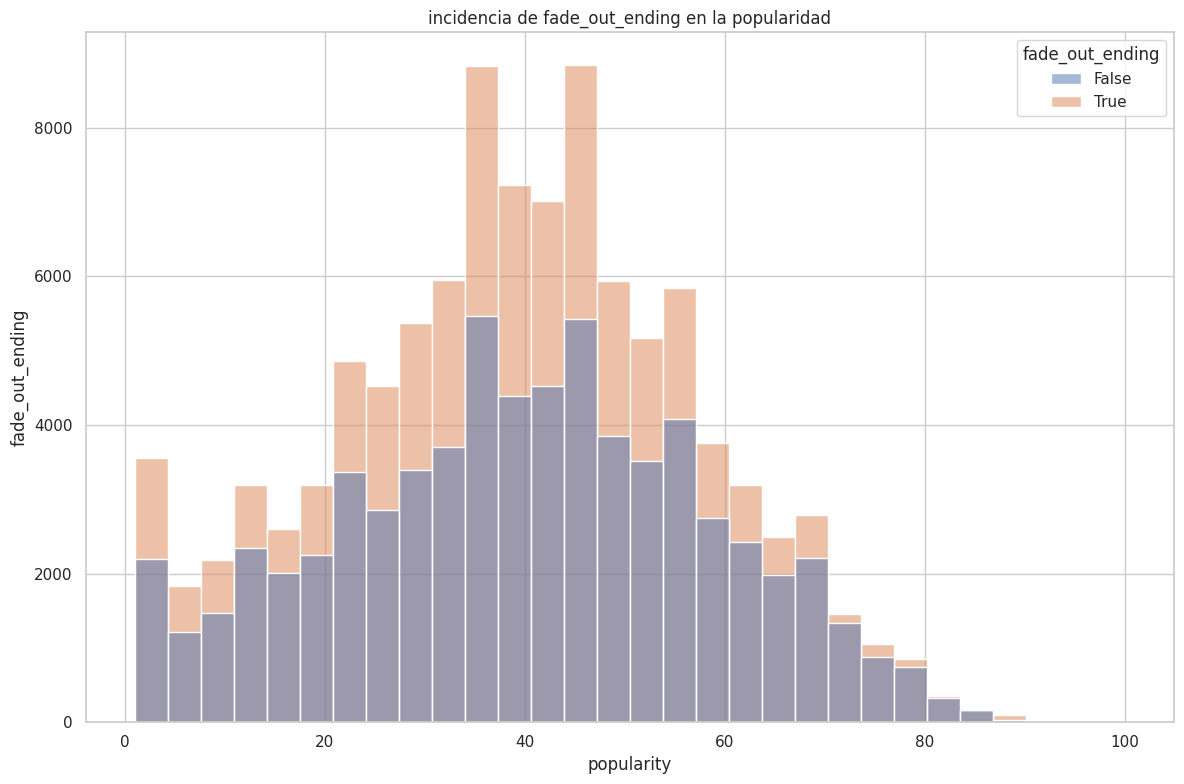

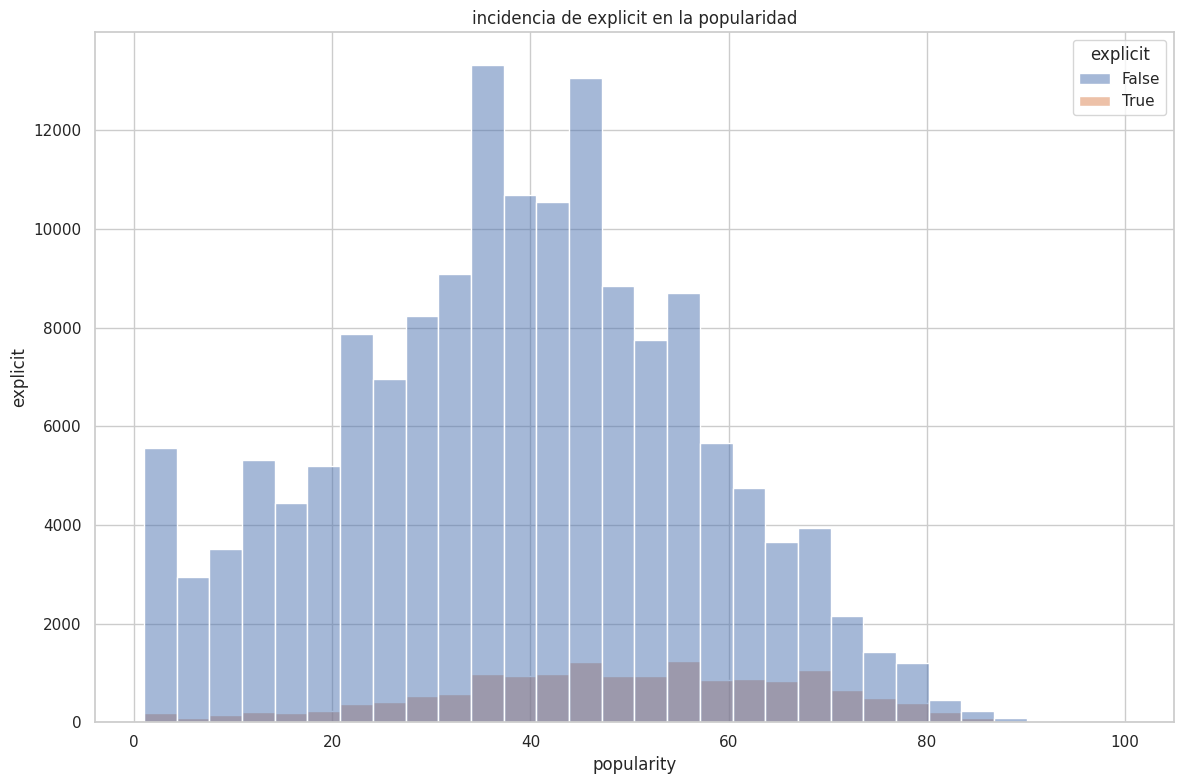

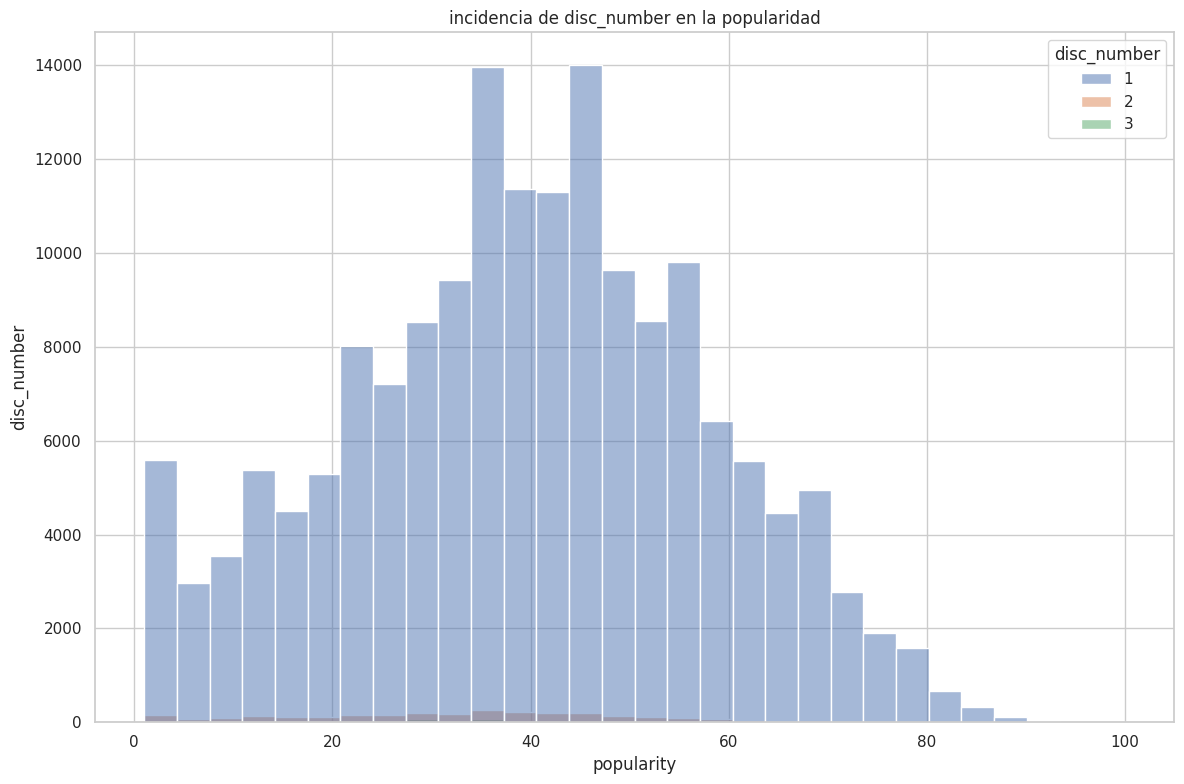

In [ ]:
categorias_formales= ['time_signature', 'key', 'mode','fade_out_ending','explicit','disc_number']
sns.set_style("whitegrid")
# sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
for col in categorias_formales:
  plt.title(f'incidencia de {col} en la popularidad')
  plt.xlabel('popularity')
  plt.ylabel(col)
  sns.histplot(df,x='popularity',hue=col ,bins=30)
  plt.tight_layout()
  plt.show()

### Análisis Multivariado

<ipython-input-126-0160e5e34780>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['key', 'mode'])['popularity'].mean().reset_index()


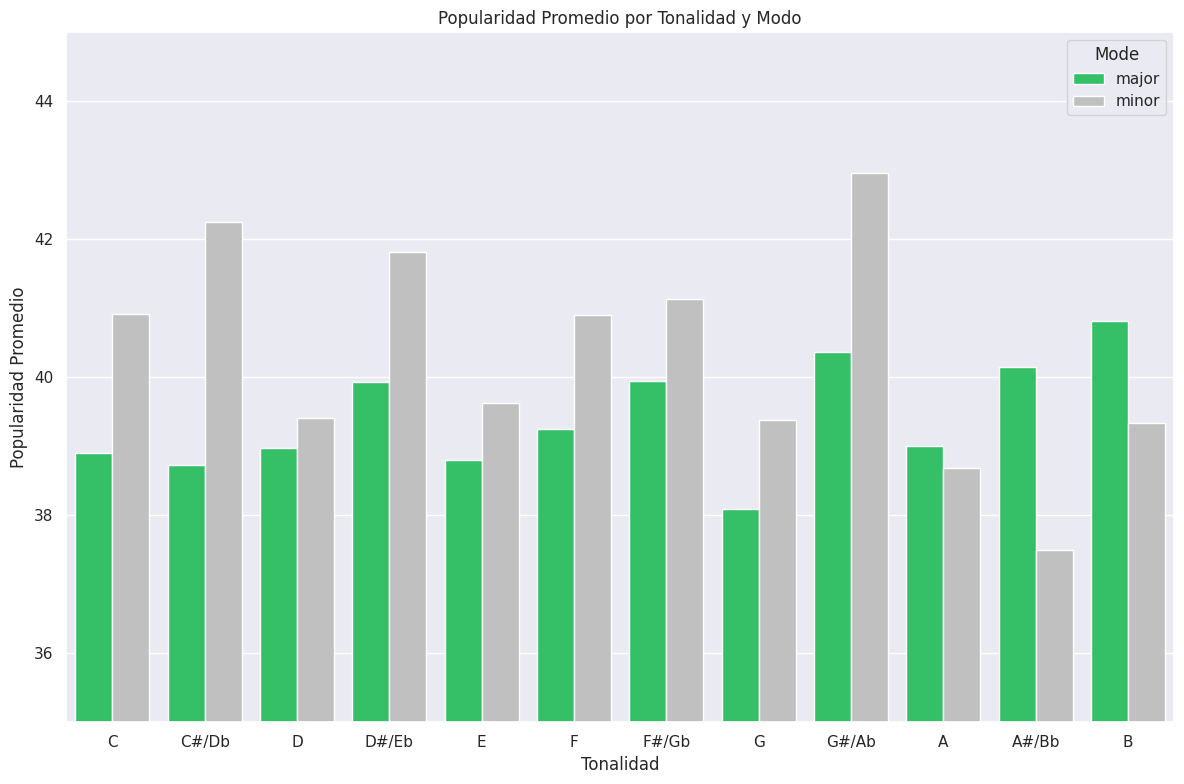

In [ ]:
# Agrupar por 'key' y 'mode', calcular la media de 'popularity'
grouped_data = df.groupby(['key', 'mode'])['popularity'].mean().reset_index()

# Crear el gráfico de barras agrupadas
sns.barplot(x='key', y='popularity', hue='mode', data=grouped_data, palette=['#1ED760', '#c0c0c0'])

# Personalizar el gráfico
plt.xlabel('Tonalidad')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad Promedio por Tonalidad y Modo')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.ylim(35, 45)
plt.legend(title='Mode')
plt.show()

Text(0.5, 1.0, 'promedio de popularity por valor de loudness')

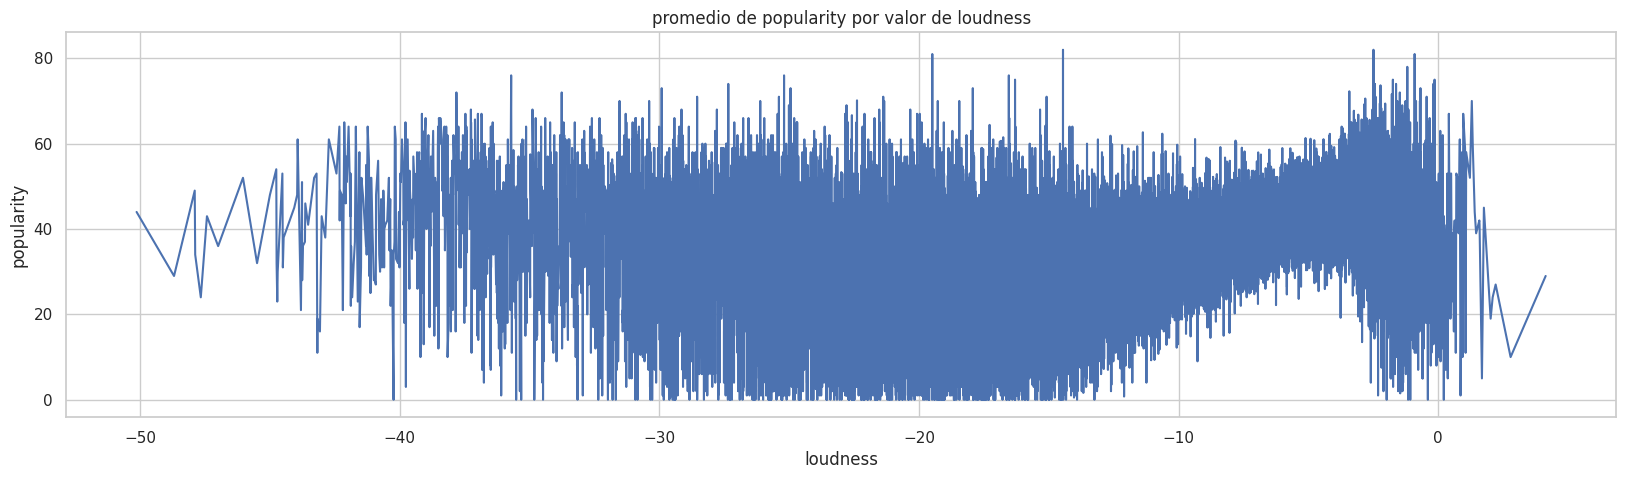

In [83]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("loudness")["popularity"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('popularity')
axis.set_xlabel('loudness')
axis.set_title("promedio de popularity por valor de loudness")

Text(0.5, 0, 'popularity')

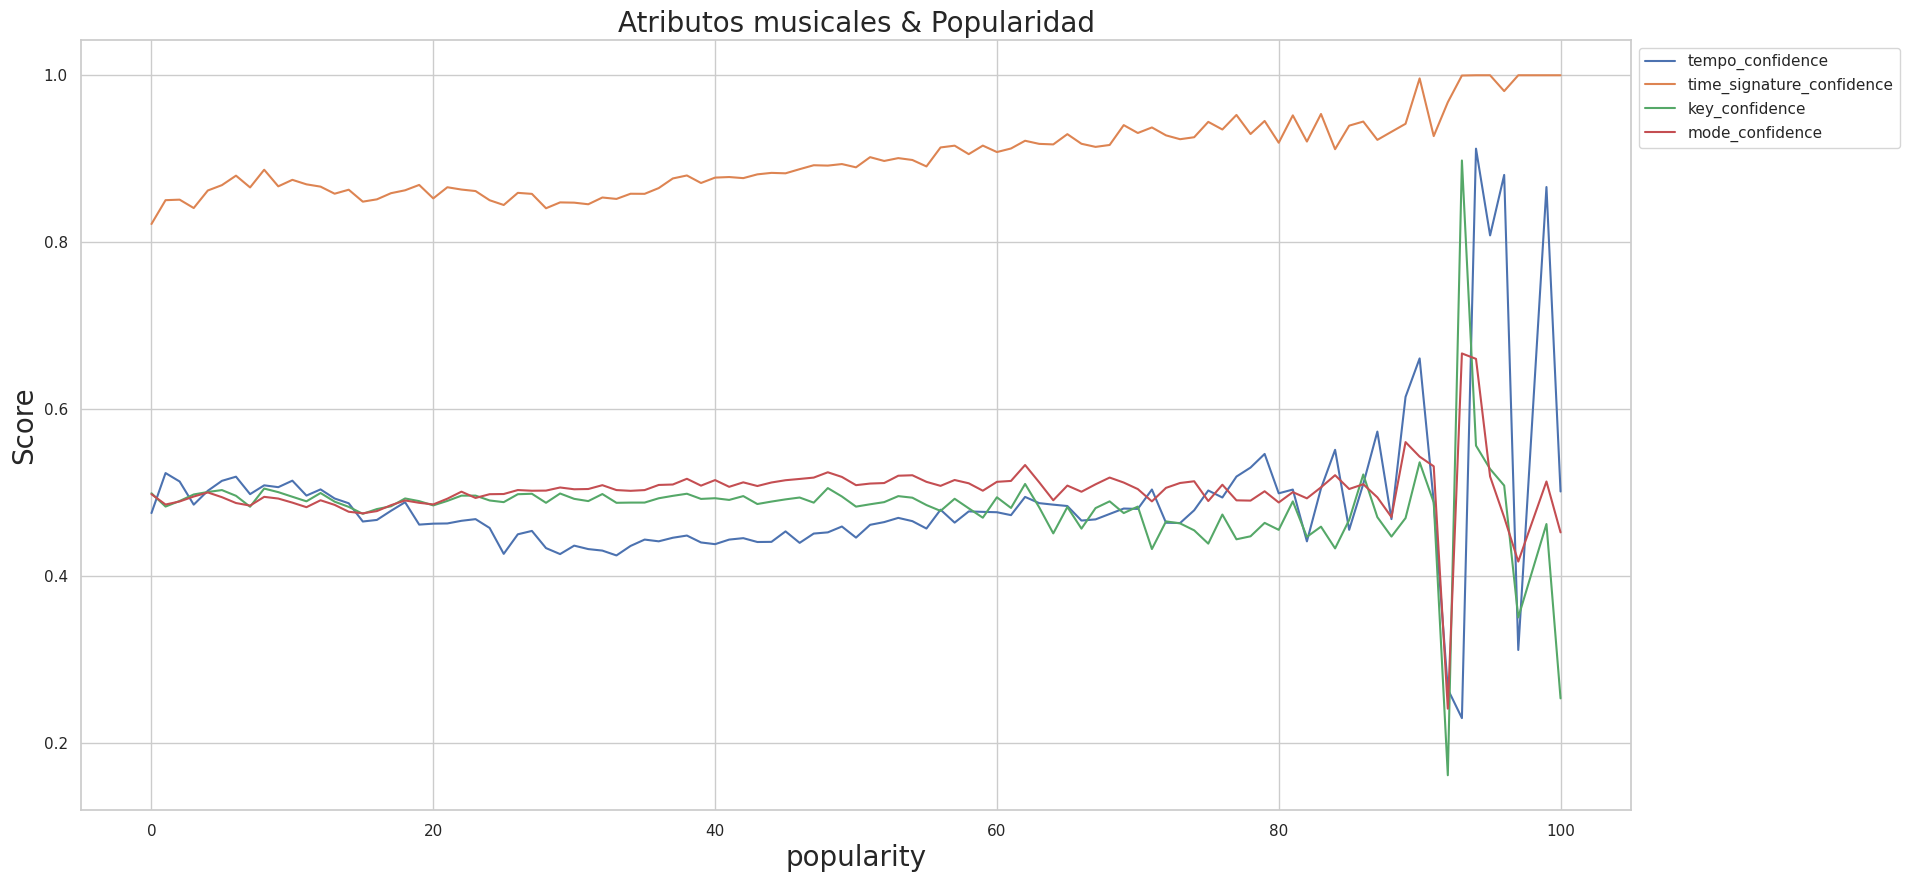

In [84]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
# the columns that we are interseted in
target_cols = ["tempo_confidence","time_signature_confidence","key_confidence","mode_confidence"]
for c in target_cols:
    # group the data by year, and plot the mean score of all music in that year
    x = df.groupby("popularity")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Atributos musicales & Popularidad', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel('Score', fontsize = 20)
ax.set_xlabel('popularity', fontsize = 20)

---
## Data Wrangling

### Valores infinitos

In [94]:
# Selecciona las columnas numéricas
numerical_cols = df.select_dtypes(include=['number']).columns
# Reemplaza los valores infinitos por NaN en esas columnas
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)

### Valores nulos

In [95]:
# recuento de cantidad de NaNs
contar_nulos = df.isnull().sum()
# Filtrar las columnas con al menos un valor nulo
columnas_con_nulos = contar_nulos[contar_nulos > 0]
columnas_con_nulos

artista            2
album              6
preview_url    37478
dtype: int64

In [13]:
# recuento de cantidad de NaNs
contar_ceros = df.eq(0).sum()
# Filtrar las columnas con al menos un valor nulo
columnas_con_ceros = contar_ceros[contar_ceros > 0]
columnas_con_ceros

popularity                     3482
end_of_fade_in               145468
tempo                           138
tempo_confidence               2988
time_signature_confidence       277
key_confidence                 7598
mode_confidence                2152
bars                            138
beats                           138
sections                         15
tatums                          138
fade_out_length_sec           15397
bar_length_sec                  138
fade_out_length_bars          16890
dtype: int64

In [96]:
# Se eliminan variables identificatorias y redundantes que no aportan valor al modelo.
drop_columns = ['artista', 'album', 'cancion', 'id_track', 'fecha_lanzamiento','duration_ms','preview_url', 'Spotify_URI',
       'start_of_fade_out', 'beats', 'fade_out_length_sec','bar_length_sec','tatums']
df = df.drop(drop_columns, axis=1)
df.shape

(185457, 24)

In [97]:
# Para estas variables el valor 0 se reconoce como falta de información, por lo tato se eliminan los registros
df = df[~(df[['popularity', 'tempo', 'sections']] == 0).any(axis=1)]

In [98]:
# recuento de cantidad de NaNs
contar_ceros = df.eq(0).sum()
# Filtrar las columnas con al menos un valor nulo
columnas_con_ceros = contar_ceros[contar_ceros > 0]
columnas_con_ceros

explicit                     164977
end_of_fade_in                51963
tempo_confidence               2779
time_signature                    2
time_signature_confidence       137
key                           20238
key_confidence                 7438
mode                          66318
mode_confidence                2081
fade_out_length_bars          16508
fade_out_ending               73995
popularity_bucket            134521
dtype: int64

In [99]:
# finalmente se elimina cualquier fila donde se reconozcan alguna falta de dato.
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.shape

(181838, 24)

### Limpieza de duplicados

In [100]:
df.drop_duplicates(inplace=True)
df.shape

(181781, 24)

## Estadística descriptiva

Tabla con estadísticas descriptivas de los datos numéricos:

In [19]:
df.describe().round(2)

popularity  disc_number  track_number  duration_sec  end_of_fade_in  \
count   181781.00    181781.00     181781.00     181781.00       181781.00   
mean        39.40         1.02          5.57        243.94            0.56   
std         18.24         0.17          5.68        118.96            1.60   
min          1.00         1.00          1.00         29.00            0.00   
25%         27.00         1.00          2.00        184.00            0.00   
50%         40.00         1.00          4.00        226.00            0.00   
75%         52.00         1.00          8.00        278.00            0.00   
max        100.00         3.00        183.00       4440.00          121.00   

        loudness      tempo  tempo_confidence  time_signature_confidence  \
count  181781.00  181781.00         181781.00                  181781.00   
mean       -8.72     122.22              0.46                       0.88   
std         5.36      29.66              0.30                       0.21   
min       -50.14      30.00              0.00                       0.00   
25%       -10.66      99.00              0.18                       0.86   
50%        -7.36     122.00              0.44                       0.99   
75%        -5.18     140.00              0.75                       1.00   
max         4.14     248.00              1.00                       1.00   

       key_confidence  mode_confidence       bars   sections   segments  \
count       181781.00        181781.00  181781.00  181781.00  181781.00   
mean             0.49             0.51     125.21      10.48     920.89   
std              0.25             0.18      68.58       4.89     515.54   
min              0.00             0.00       5.00       1.00      14.00   
25%              0.32             0.39      84.00       8.00     647.00   
50%              0.50             0.52     113.00      10.00     823.00   
75%              0.66             0.63     151.00      12.00    1057.00   
max              1.00             1.00    2566.00     209.00   14115.00   

       fade_out_length_bars  genres_count  
count             181781.00     181781.00  
mean                   4.18          1.71  
std                    3.34          1.19  
min                    0.00          1.00  
25%                    2.13          1.00  
50%                    3.56          1.00  
75%                    5.53          2.00  
max                  137.12         11.00

In [20]:
numerical_cols = df.select_dtypes(include=['number']).columns
# numerical_df = df[numerical_cols]

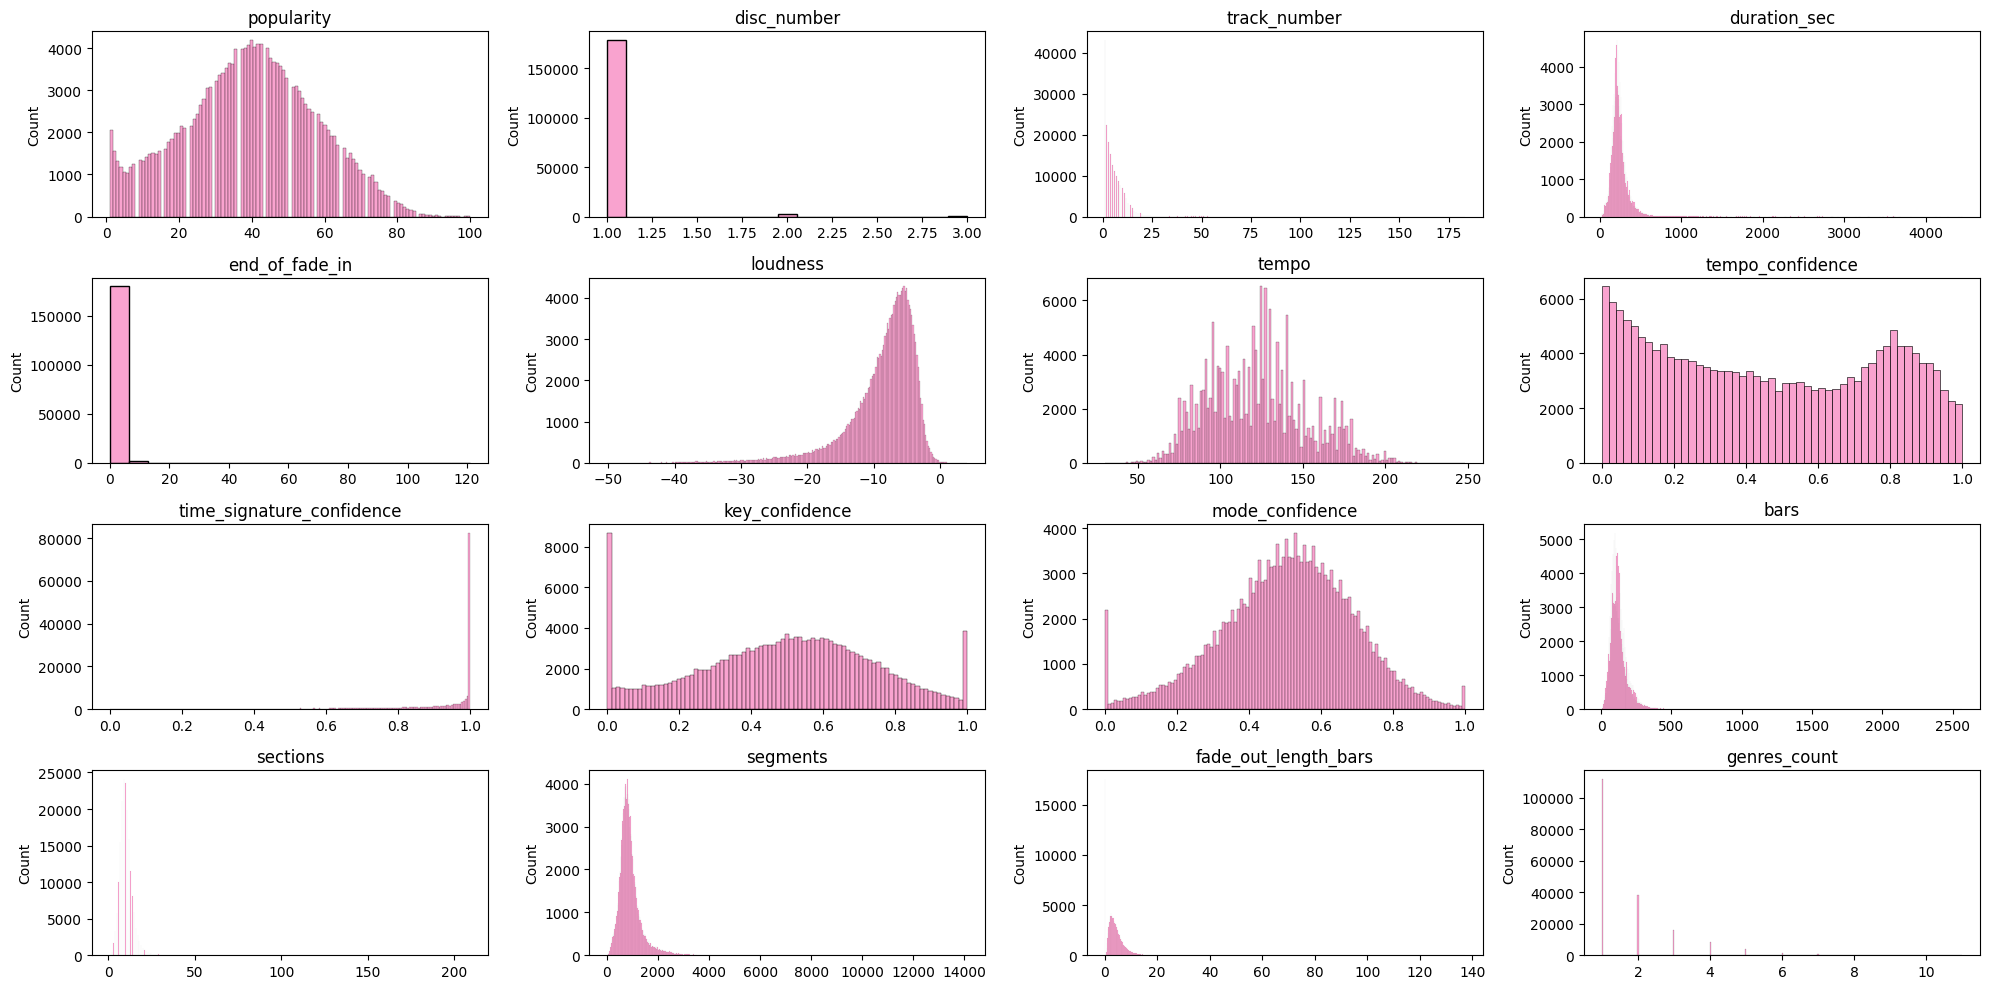

In [23]:
#Visualizamos la distribución de las variables.
columns = 4
# calcular la cantidad de filas.
rows = int(np.ceil(len(numerical_cols) / columns))
# crear subplots con la cantidad de filas correctas.
fig, axes = plt.subplots(rows, columns, figsize=(20,10))

for current_idx, variable in enumerate(numerical_cols):
    i = current_idx // columns
    j = current_idx % columns
    # manejo de potenciales subplots vacíos en la última fila.
    if i >= rows:
        break  # Stop al alcanzar la última fila.
    sns.histplot(df[variable], ax=axes[i][j], color='#F785C0')
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
plt.tight_layout()
plt.show()

### Análisis de outliers

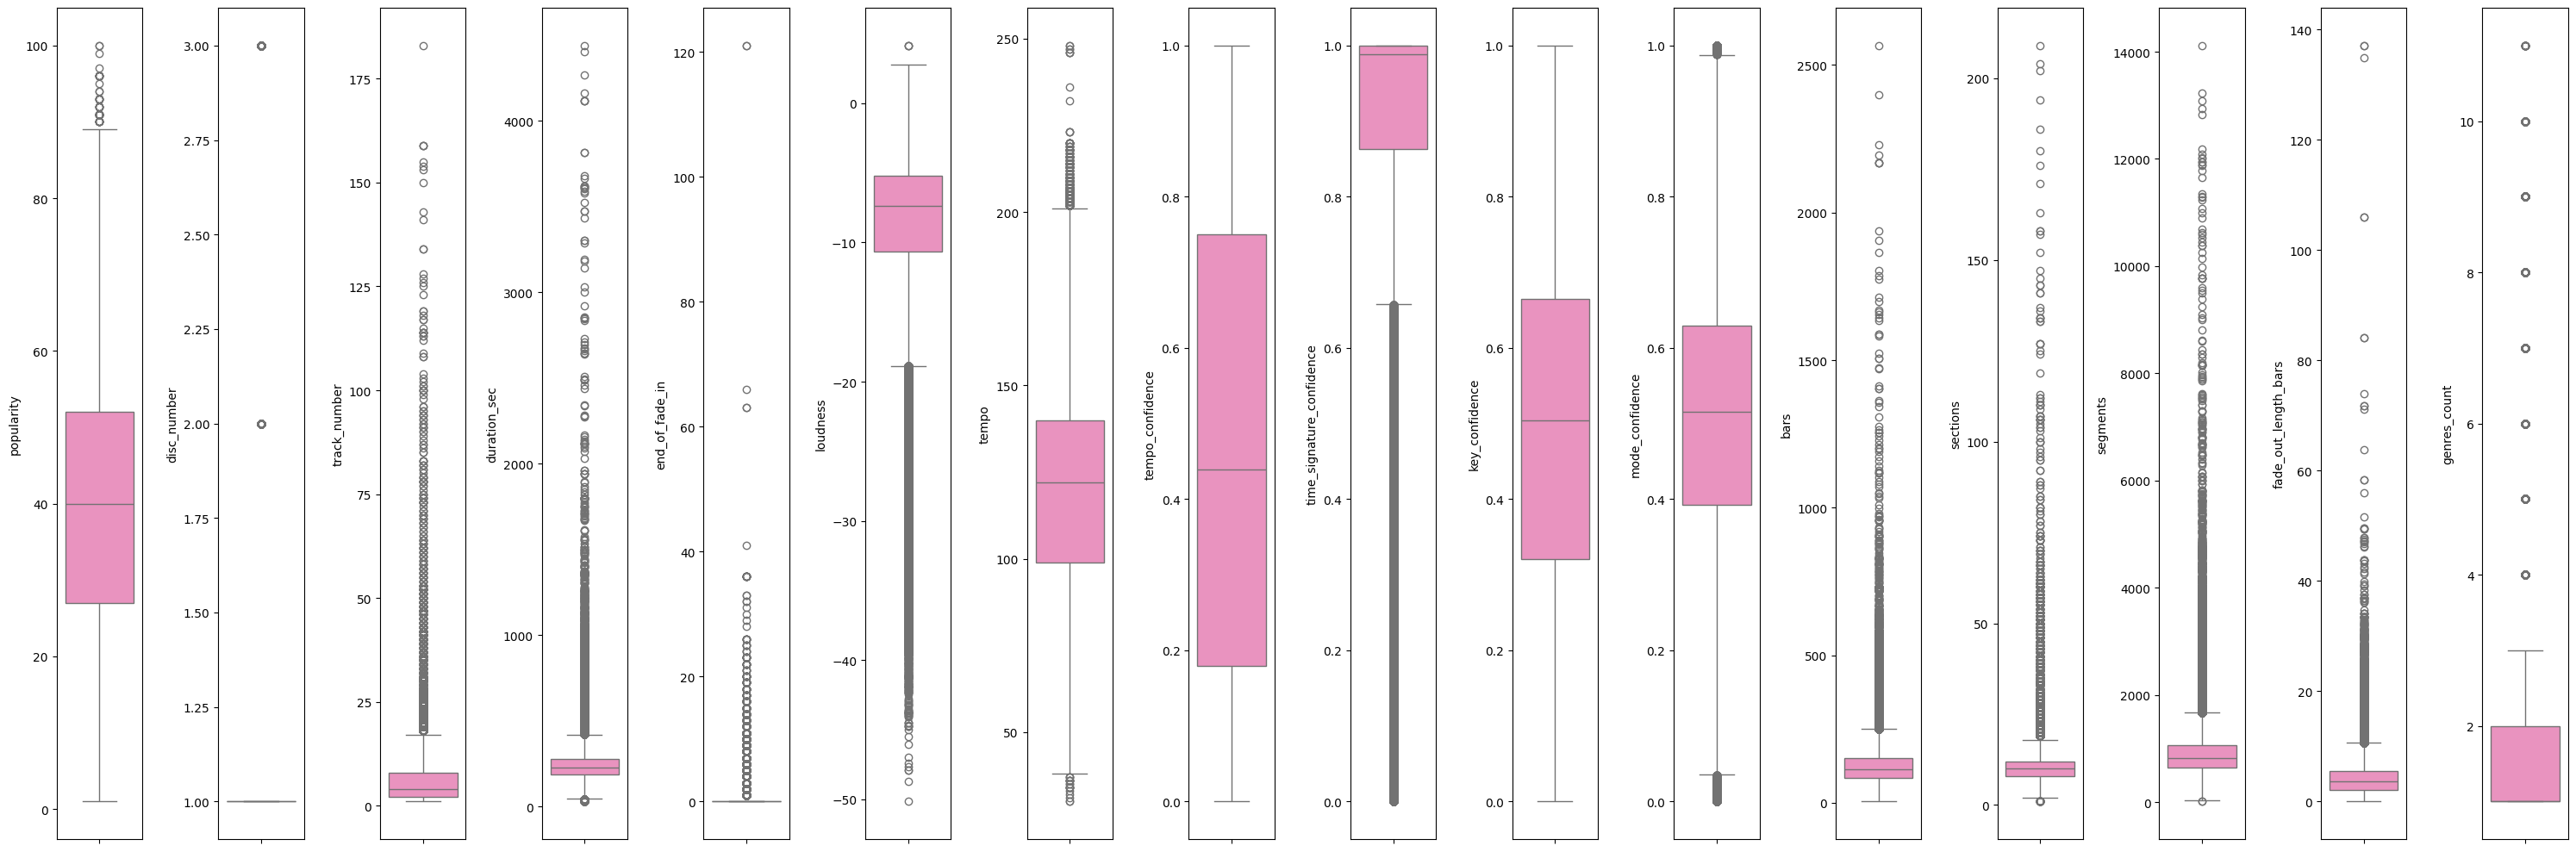

In [24]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(30,10))


for ax, variable in zip(axes, numerical_cols):
    ax = sns.boxplot( y=variable, data=df, ax=ax,color='#F785C0')
plt.tight_layout()

Podemos ver que las siguientes variables tienen gran cantidad de outliers que vale la pena limpiar: **tempo**, **key_confidence** y **mode_confidence**. El resto tiene que ver con la distribucion no simetrica de las variables que describen, como por ejemplo, tener un sesgo hacia concentracion de canciones de baja instrumentalidad o de bajo tono acustico.

#### Metodo IQR

In [101]:
# Esta función calcula el percentil N y el percentil 100-N (por defecto = 10) de la columna especificada. Estos valores dividen los datos en cuatro partes iguales.
# El valor del percentil influye en la cantidad de datos que se consideran outliers. Un percentil más bajo eliminará más datos.
def remove_outliers_N_percentile(data,name='feature',percentile=10):
    #Guardar percentil a utilizar para calcular el rango intercuartílico.
    q10,q90=np.percentile(data[name],percentile),np.percentile(data[name],100-percentile)
    #Calcular el rango intercuartil
    iqr_cut=1.5*(q90-q10)
    #Crear las variables de corte:
    # Se establecen un límite inferior y un límite superior utilizando el IQR. Los valores que caen fuera de este rango se consideran outliers.
    lower,upper=q10-iqr_cut,q90+iqr_cut
    #Remover outliers
    clean_df=data[(data[name] >= lower) & (data[name] <= upper)]
    #La función devuelve un nuevo DataFrame sin los outliers.
    return clean_df

In [26]:
print(f"Cantidad de filas en dataFrame de entrada: {len(df)}")

Cantidad de filas en dataFrame de entrada: 181781


In [102]:
# Agresividad SUAVE
# Método IQR percentil 15
columnas_con_outliers = ['popularity', 'duration_sec','bars', 'sections', 'segments','genres_count']
for col in columnas_con_outliers:
    df=remove_outliers_N_percentile(df,col,15)
print(f"Cantidad de filas en dataFrame de salida: {len(df)}")

Cantidad de filas en dataFrame de salida: 173775


In [103]:
# Agresividad MEDIA
# Método IQR percentil 10
columnas_con_outliers = ['loudness', 'tempo','fade_out_length_bars']
for col in columnas_con_outliers:
    df=remove_outliers_N_percentile(df,col,10)
print(f"Cantidad de filas en dataFrame de salida: {len(df)}")

Cantidad de filas en dataFrame de salida: 172149


In [104]:
# Agresividad FUERTE
# Método IQR percentil 5
columnas_con_outliers = ['track_number','tempo_confidence', 'time_signature_confidence', 'key_confidence', 'mode_confidence',]
for col in columnas_con_outliers:
    df=remove_outliers_N_percentile(df,col,5)
print(f"Cantidad de filas en dataFrame de salida: {len(df)}")

Cantidad de filas en dataFrame de salida: 171745



Resultados post tratamiento de Outliers


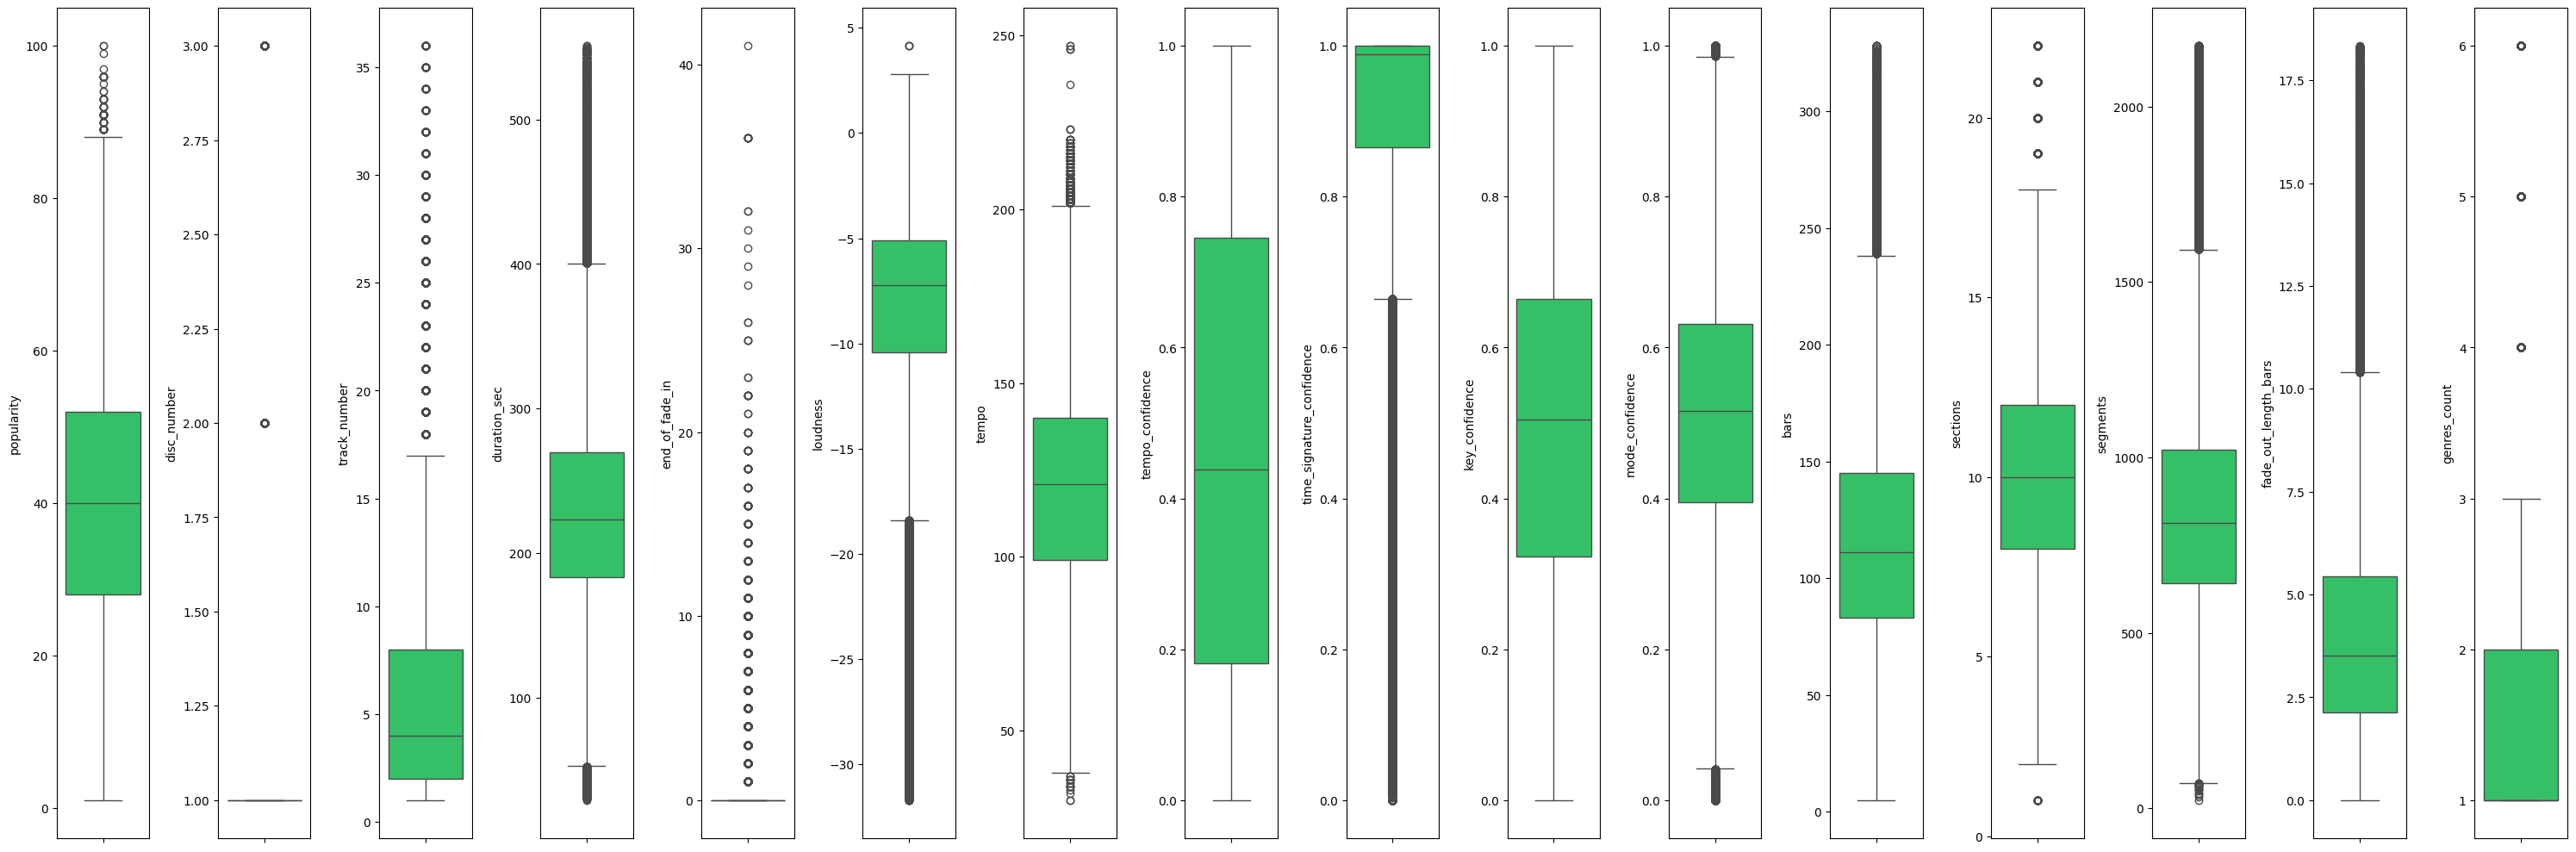

In [30]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(30,10))
for ax, variable in zip(axes, numerical_cols):
    ax = sns.boxplot( y=variable, data=df, ax=ax,color='#1ED760')
plt.tight_layout()

In [31]:
df.describe().round(2)

popularity  disc_number  track_number  duration_sec  end_of_fade_in  \
count   171744.00    171744.00     171744.00     171744.00       171744.00   
mean        39.78         1.02          5.47        230.71            0.53   
std         18.05         0.17          4.86         75.05            1.44   
min          1.00         1.00          1.00         29.00            0.00   
25%         28.00         1.00          2.00        183.00            0.00   
50%         40.00         1.00          4.00        223.00            0.00   
75%         52.00         1.00          8.00        270.00            0.00   
max        100.00         3.00         36.00        551.00           41.00   

        loudness      tempo  tempo_confidence  time_signature_confidence  \
count  171744.00  171744.00         171744.00                  171744.00   
mean       -8.44     122.15              0.46                       0.88   
std         4.86      29.68              0.30                       0.21   
min       -31.70      30.00              0.00                       0.00   
25%       -10.43      99.00              0.18                       0.87   
50%        -7.23     121.00              0.44                       0.99   
75%        -5.11     140.00              0.75                       1.00   
max         4.14     247.00              1.00                       1.00   

       key_confidence  mode_confidence       bars   sections   segments  \
count       171744.00        171744.00  171744.00  171744.00  171744.00   
mean             0.49             0.51     118.08      10.01     860.55   
std              0.25             0.18      49.53       3.21     338.37   
min              0.00             0.00       5.00       1.00      23.00   
25%              0.32             0.40      83.00       8.00     642.00   
50%              0.50             0.52     111.00      10.00     812.00   
75%              0.66             0.63     145.00      12.00    1022.00   
max              1.00             1.00     328.00      22.00    2173.00   

       fade_out_length_bars  genres_count  
count             171744.00     171744.00  
mean                   4.04          1.67  
std                    2.89          1.07  
min                    0.00          1.00  
25%                    2.13          1.00  
50%                    3.52          1.00  
75%                    5.44          2.00  
max                   18.34          6.00

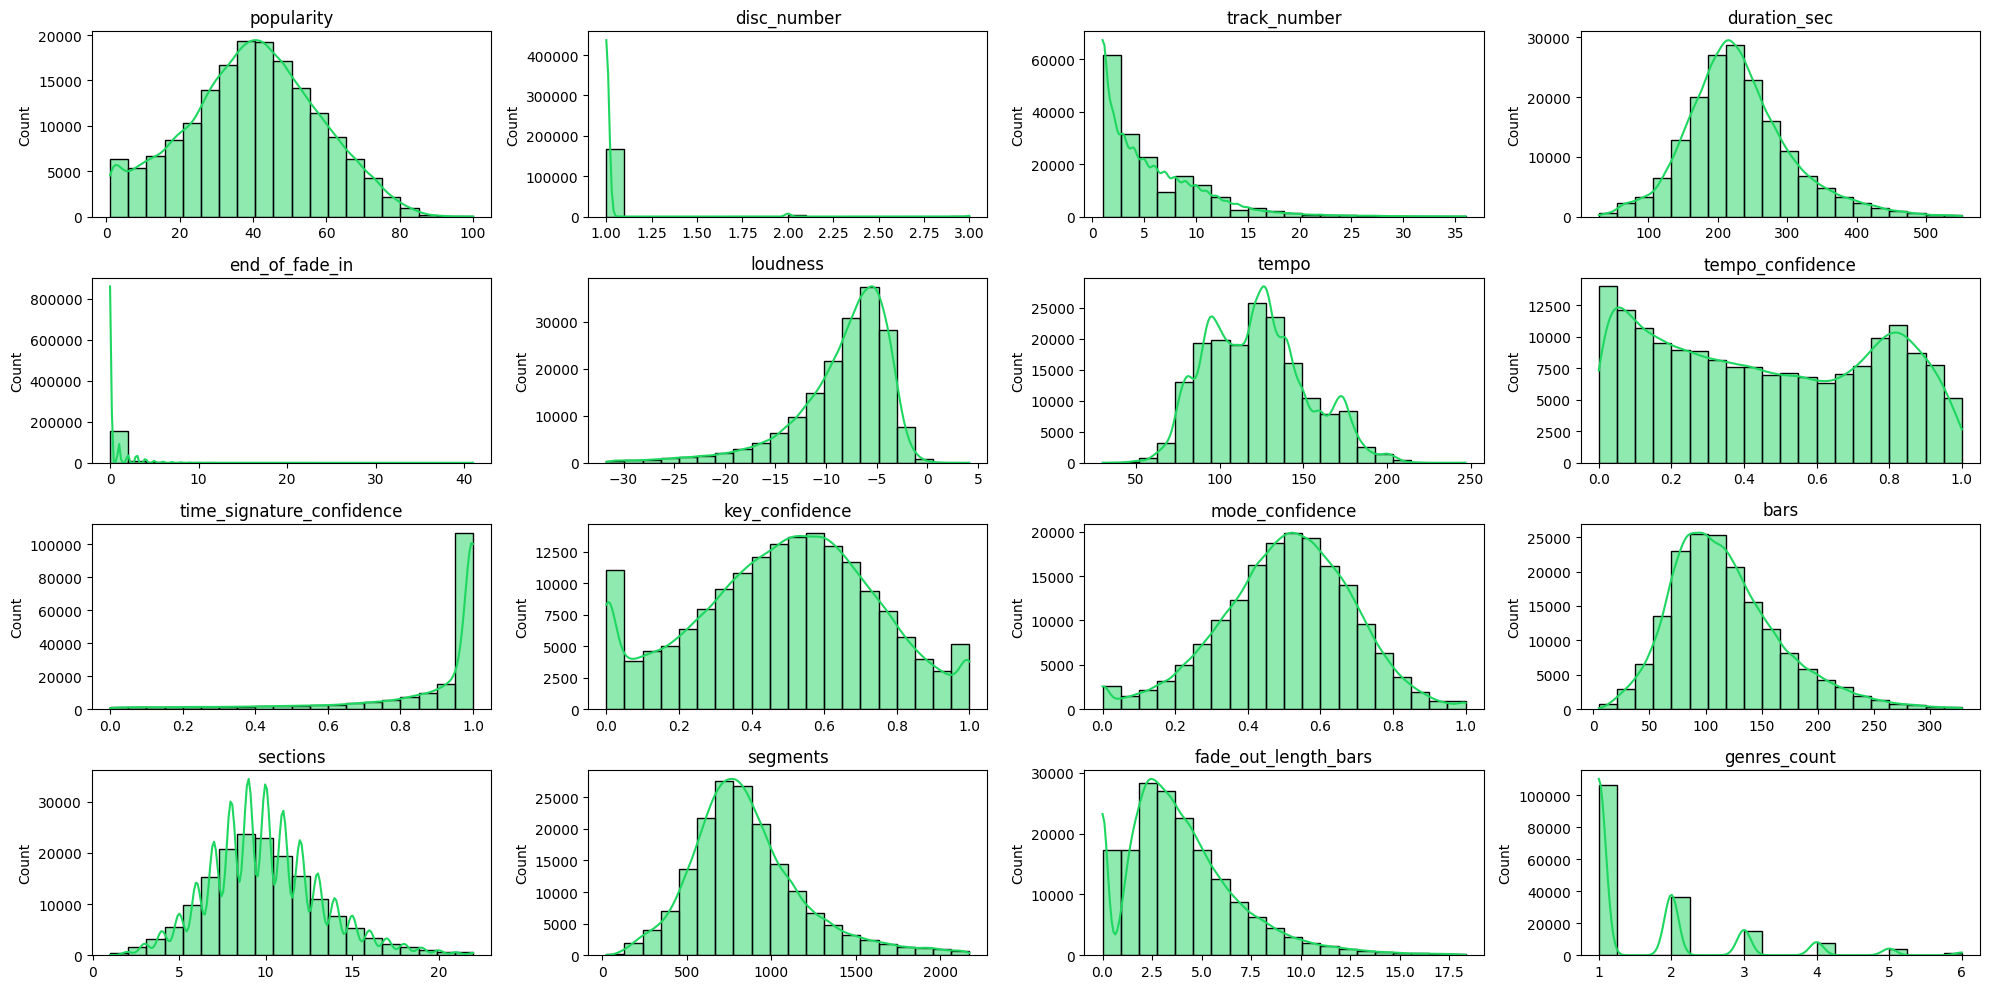

In [32]:
#Visualizamos la distribución de las variables.
columns = 4
# calcular la cantidad de filas.
rows = int(np.ceil(len(numerical_cols) / columns))
# crear subplots con la cantidad de filas correctas.
fig, axes = plt.subplots(rows, columns, figsize=(20,10))

for current_idx, variable in enumerate(numerical_cols):
    i = current_idx // columns
    j = current_idx % columns

    # manejo de potenciales subplots vacíos en la última fila.
    if i >= rows:
        break  # Stop al alcanzar la última fila.

    sns.histplot(df[variable], ax=axes[i][j], color='#1ED760',kde=True, bins=20,)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
plt.tight_layout()
plt.show()

Se observa que ahora el dataset está más balanceado.

### Análisis de correlación

In [108]:
numerical_cols = df.select_dtypes(include=['number']).columns
# numerical_df = df[numerical_cols].copy()

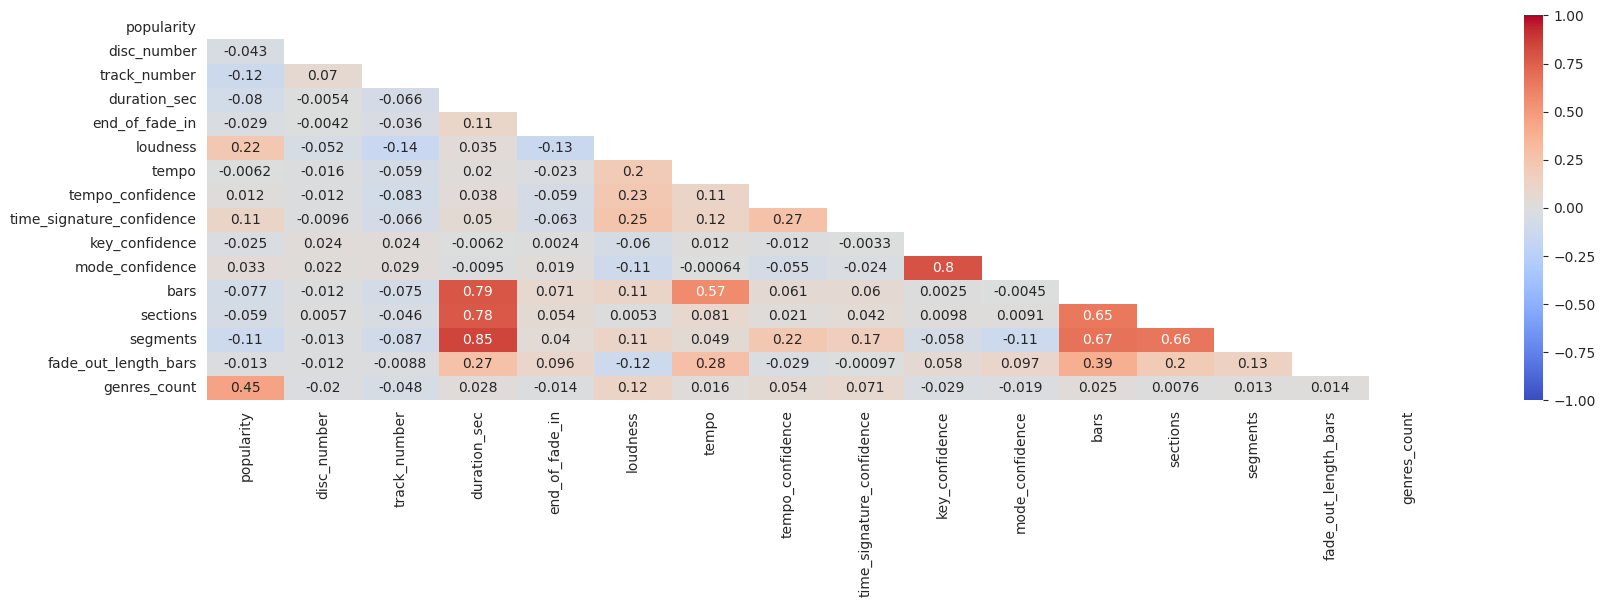

In [35]:
# heatmap for correlation
corr = df[numerical_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set_style('white')
#sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
plt.figure(figsize=(20, 5))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')
plt.show()

In [109]:
df.drop(['duration_sec','segments','bars','key_confidence'],axis=1,inplace=True)
numerical_cols = df.select_dtypes(include=['number']).columns

In [37]:
df.shape

(171744, 20)

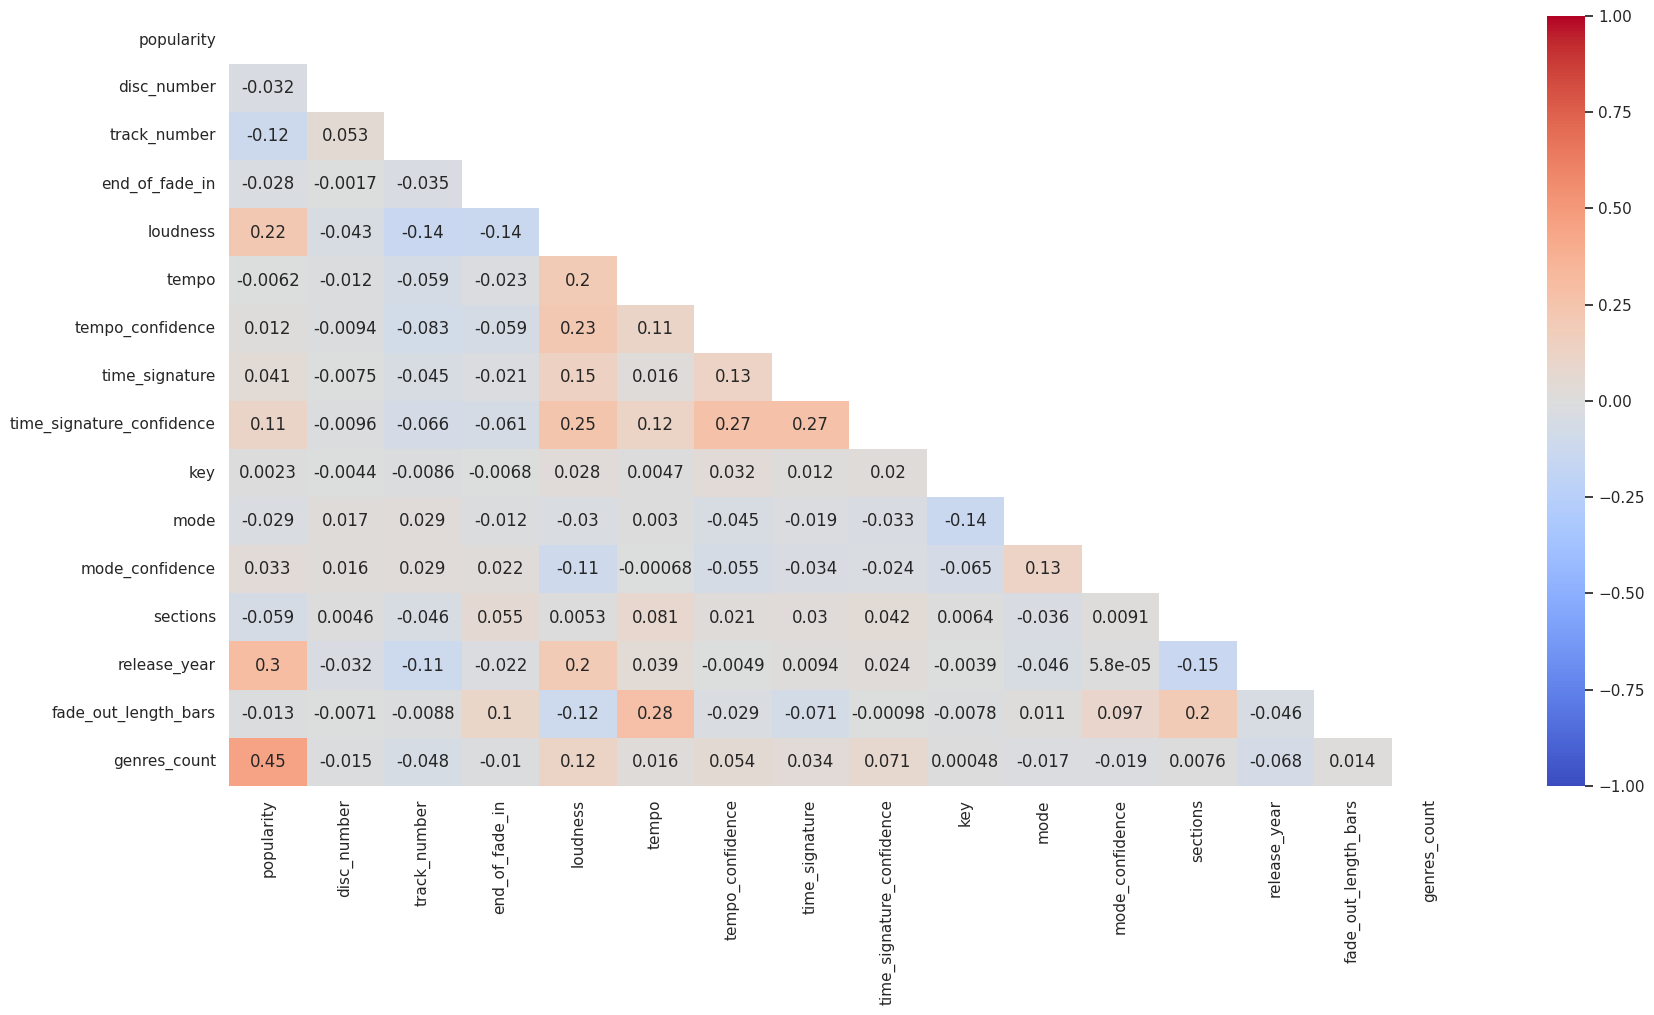

In [110]:
# heatmap for correlation
corr = df[df.select_dtypes(include=['number']).columns].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set_style('white')
plt.figure(figsize=(20, 10))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')
plt.show()

In [40]:
# Medias por target y características

hits = df[numerical_cols].loc[df['popularity_bucket'] == True]
no_hits = df[numerical_cols].loc[df['popularity_bucket'] == False]

hits_means = pd.DataFrame(hits.describe().loc['mean'])
flops_means = pd.DataFrame(no_hits.describe().loc['mean'])

means = pd.concat([hits_means,flops_means],axis=1)
means.columns = ['hit_mean','flop_mean']
means

hit_mean   flop_mean
popularity                  62.180498   31.777975
disc_number                  1.012592    1.026644
track_number                 4.711260    5.741154
end_of_fade_in               0.457155    0.559214
loudness                    -6.930339   -8.972227
tempo                      122.302859  122.089287
tempo_confidence             0.479125    0.452937
time_signature_confidence    0.918012    0.871641
mode_confidence              0.511617    0.505459
sections                     9.803435   10.079315
fade_out_length_bars         3.917198    4.086706
genres_count                 2.383459    1.416631

In [46]:
# guardar una copia del dataset las transformaciones aplicadas hasta acá
df.to_csv("datasetMerged-newFeatures-dataTransformation-dataWrangling.csv", index=False) # A partir de ahora trabajaremos con este archivo

# Breakpoint #2

In [88]:
# Por practicidad se generó un dataset parcial que integra los resultados obtenidos hasta este punto.
# Podemos comenzar el proceso a partir de acá:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/vierbo/Data-Science/refs/heads/main/from_scratch_to_charts/datasetMerged-newFeatures-dataTransformation-dataWrangling.csv")
df.shape

(171744, 20)

# Modelado

In [43]:
#Separamos en X e y.
X = df.drop(['popularity','popularity_bucket'], axis=1) #Elimino de mi dataset la variable a predecir y ademas sacamos variables como Track, Artist y Uri que no sirven para el analisis
y = df.popularity #Defino el Target

In [44]:
# Agrupar variables numéricas y categóricas
lista_numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['popularity'], axis=1).columns
lista_categorical_features = df.select_dtypes(include=['object','bool','category']).drop(['popularity_bucket'], axis=1).columns

In [45]:
lista_numeric_features

Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')

In [46]:
lista_categorical_features

Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object')

In [47]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

((120220, 18), (51524, 18))

In [ ]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

In [48]:
from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [49]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [50]:
categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder())])

In [51]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lista_numeric_features),
        ('cat', categorical_transformer, lista_categorical_features)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object'))])

In [53]:
X_train_prepro=preprocessor.fit_transform(X_train)

### Algoritmos de Clasificación

#### Regresión logística

In [43]:
from sklearn.linear_model import LogisticRegression
# instancio
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [109]:
# fitteo
pipe1.fit(X_train, y_train)
# predigo
LogisticRegression_score = pipe1.score(X_test,y_test)
LogisticRegression_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.056381492120177006

In [122]:
import plotly.graph_objects as go
plt.figure(figsize=(1, 1))
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = LogisticRegression_score,
    title = {'text': "LogisticRegression score"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))
fig.update_layout(
    width=300,  # Ajusta el ancho en píxeles
    height=300  # Ajusta el alto en píxeles
)
plt.tight_layout()
fig.show()

<Figure size 100x100 with 0 Axes>

#### KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
# instancio
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['genero', 'explicit', 'time_signature', 'key', 'mode', 'release_year',
       'fade_out_ending'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [112]:
# fitteo
pipe1.fit(X_train, y_train)
# predigo
KNeighborsClassifier_score = pipe1.score(X_test,y_test)
KNeighborsClassifier_score

0.12101156742488937

In [121]:
import plotly.graph_objects as go
plt.figure(figsize=(1, 1))
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = KNeighborsClassifier_score,
    title = {'text': "KNeighborsClassifier score"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))
fig.update_layout(
    width=300,  # Ajusta el ancho en píxeles
    height=300  # Ajusta el alto en píxeles
)
plt.tight_layout()
fig.show()

<Figure size 100x100 with 0 Axes>

#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
# instancio
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [124]:
# fitteo
pipe1.fit(X_train, y_train)
# predigo
DecisionTreeClassifier_score = pipe1.score(X_test,y_test)
DecisionTreeClassifier_score

0.2670600108687214

In [142]:
import plotly.graph_objects as go
plt.figure(figsize=(1, 1))
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = DecisionTreeClassifier_score,
    title = {'text': "DecisionTreeClassifier score"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))
fig.update_layout(
    width=300,  # Ajusta el ancho en píxeles
    height=300
)
plt.tight_layout()
fig.show()

<Figure size 100x100 with 0 Axes>

#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
# instancio
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [26]:
# fitteo
pipe1.fit(X_train, y_train)
# predigo
RandomForestClassifier_score = pipe1.score(X_test,y_test)
RandomForestClassifier_score

0.3267021194006676

#### métricas

In [27]:
predictions = pipe1.predict(X_test)

In [28]:
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions, average='weighted')}")

Precision Score of the classifier is: 0.3354753071153838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions, average='weighted')}")

Recall Score of the classifier is: 0.3267021194006676


In [30]:
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions, average='weighted')}")

F1 Score of the classifier is: 0.3294382063568446


In [31]:
import plotly.graph_objects as go
plt.figure(figsize=(1, 1))
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = RandomForestClassifier_score,
    title = {'text': "RandomForestClassifier score"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))
fig.update_layout(
    width=300,  # Ajusta el ancho en píxeles
    height=300
)
plt.tight_layout()
fig.show()

<Figure size 100x100 with 0 Axes>

### Model Selection

In [33]:
# hardcodeo los resultados de las métricas para no volver a correr todos los modelos:
LogisticRegression_score = 0.056381492120177006
KNeighborsClassifier_score = 0.12101156742488937
DecisionTreeClassifier_score = 0.2670600108687214

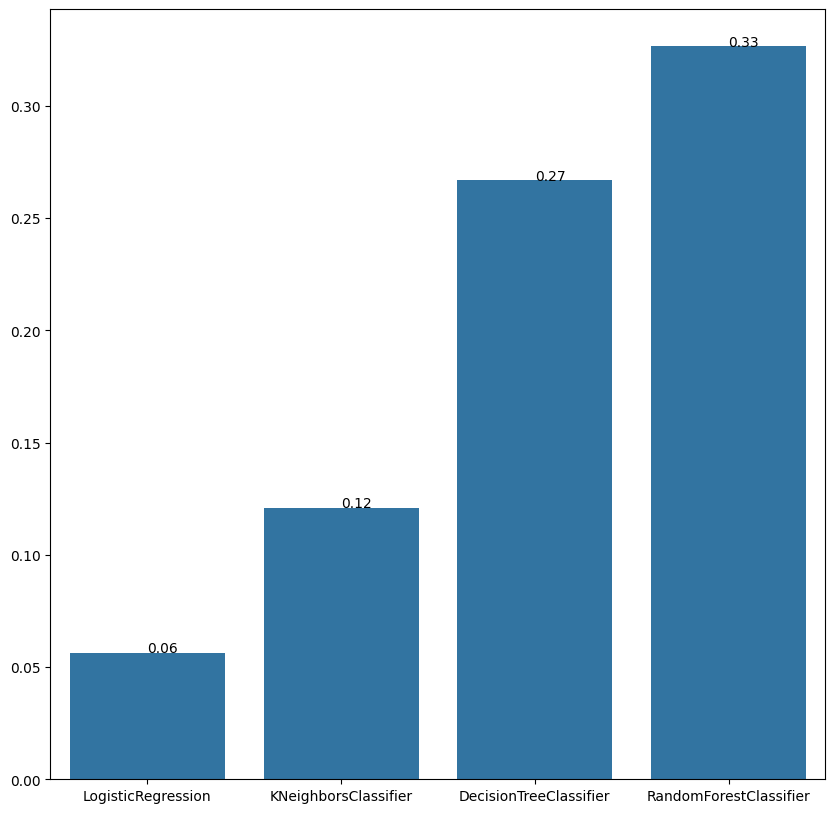

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier','RandomForestClassifier']
accuracy_scores = [LogisticRegression_score, KNeighborsClassifier_score, DecisionTreeClassifier_score,RandomForestClassifier_score]
ax = sns.barplot(x=models, y=accuracy_scores)

# Agregar los valores numéricos al final de cada barra
for container in ax.containers:
    for i, patch in enumerate(container.patches):
        current_height = patch.get_height()
        ax.annotate(str(round(current_height, 2)), (patch.get_x() + patch.get_width() / 2, current_height))

Habiendo entrenado distintos modelos en su configuración standard, podemos ver claramente cómo **Random Forest** es el que mejor se ajusta a nuestros datos con una precisión mucho mayor que la de sus competidores. Esto probablemente se deba a que es un modelo mas rico, con muchas variables por lo que la Regresion Logistica y KNN no logran capturar toda la complejidad del mismo y por esto tienen un desempeño mucho menor.

Por este motivo, ahora se entrenarán distintas variariacione en los ajustes de este modelo para encontrar su configuración óptima.

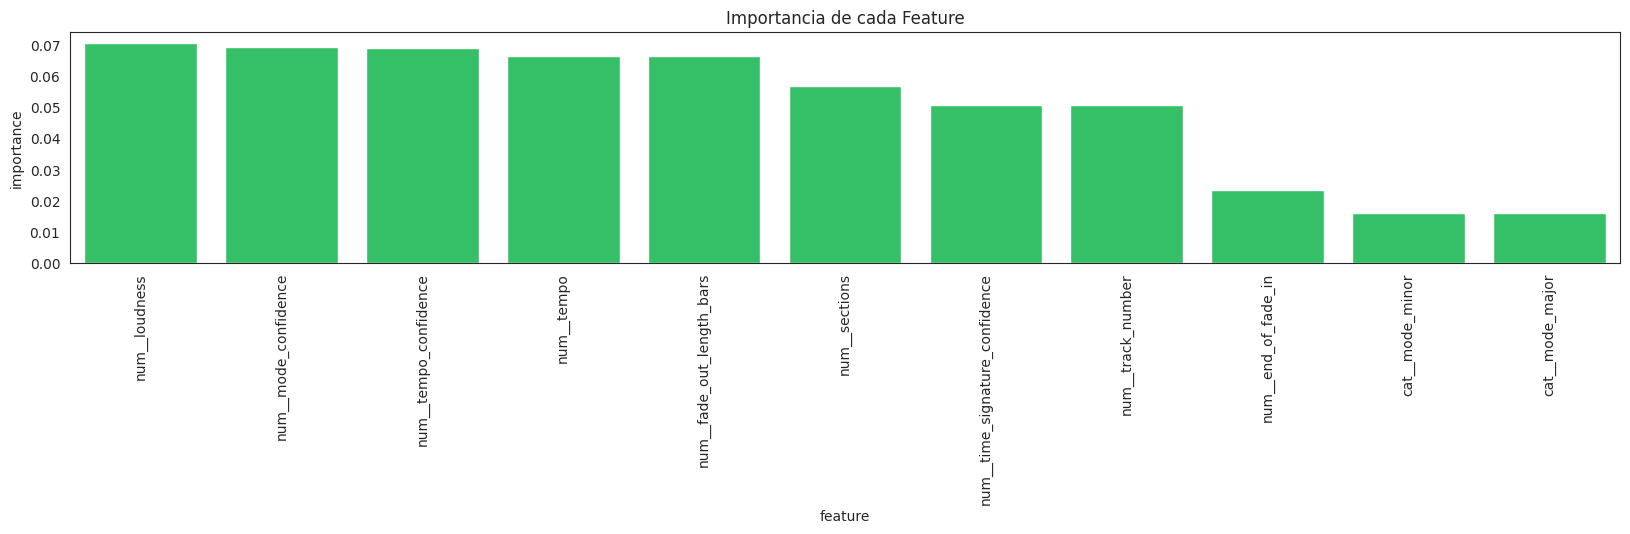

In [193]:
plt.figure(figsize=(20,3))
umbral = 11
importances = pipe1.steps[1][1].feature_importances_
# columns = X.columns
columns = pipe1.named_steps['preprocessor'].get_feature_names_out() # Accessing feature names from preprocessor

importance_df = pd.DataFrame({'feature': columns, 'importance': importances})
# Ordenar el DataFrame por importancia de forma descendente
importance_df = importance_df.sort_values('importance', ascending=False)

top_features = importance_df.head(umbral)
# Calculate the sum of 'importance' for features outside the top 10
otros = importance_df.iloc[umbral:]['importance'].sum()
resumen = pd.DataFrame({
    'feature': top_features['feature'].tolist() + ['Otros'],
    'importance': top_features['importance'].tolist() + [otros]
})
# sns.barplot(x='feature', y='importance', data = resumen)
sns.barplot(x='feature', y='importance', data = top_features, color='#1ED760')
plt.xticks(rotation=90,ha='center')
plt.title('Importancia de cada Feature')
plt.show()

A traves de este gráfico, podemos ver ademas de la accuracy, cuales serian las variables mas importantes para nuestro problema. Nuestro próximo paso es sacar todas aquellas tengan una importancia menor, para poder de esta forma afinar nuestro modelo.

A continuacion, basandonos en el gráfico anterior, vamos a hacer el ejercicio de simplificar lo mas que podamos las variables, dejando las 6 features que tienen una mayor importancia (Instrumentalness, Danceability, Acousticness, Energy, Loudness y Speechiness) para volver a calcular la accuracy de cada modelo. Esto nos permitira ver si simplificando el problema podemos tener una accuracy mejor.

## PCA

In [17]:
from sklearn.decomposition import PCA
# instancio
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', PCA(n_components=8))])
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object'))])),
                ('classifier', PCA(n_components=8))])

In [19]:
# fitteo
X_transformed = pipe1.fit_transform(X)

In [20]:
var_explicada_pca = pipe1.named_steps['classifier'].explained_variance_ratio_
var_explicada_pca

array([0.11733908, 0.10877856, 0.07730253, 0.07084979, 0.06524036,
       0.06448696, 0.06233924, 0.05930255])

In [21]:
result = pd.DataFrame(data = X_transformed
             , columns=['PCA%i' % i for i in range(8)])

result.head()

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0 -2.418542 -1.300755 -2.041084 -0.607048  0.546740 -1.249291 -0.360697   
1 -1.504567  0.731633 -0.437142 -0.916802  0.627409 -0.178367 -0.753470   
2 -1.290458 -0.117596 -0.788377 -0.283143  0.745379  0.168008 -0.953581   
3 -2.290039 -1.168862 -0.984103  0.354717  0.504203  0.591225 -1.152679   
4 -0.993068 -1.167215 -2.407676 -0.683069 -0.431146 -0.270049 -1.450615   

       PCA7  
0  1.021515  
1  0.112293  
2 -0.588836  
3 -0.327888  
4  0.887062

In [22]:
my_color=df['popularity_bucket']
my_color.replace({"nohit": 0, "hit": 1}, inplace=True)

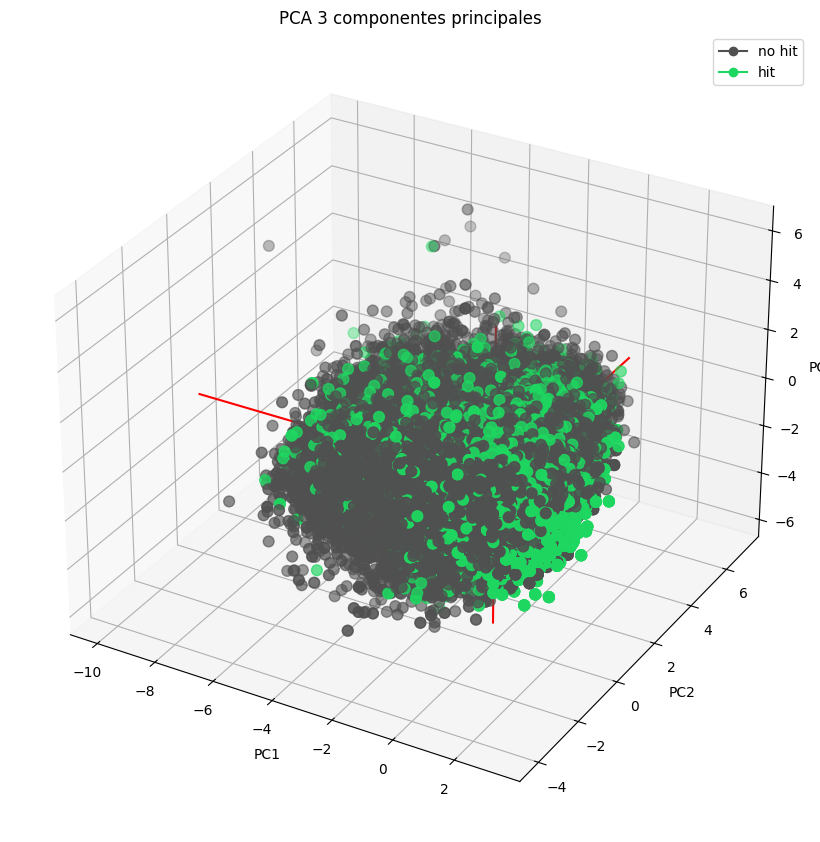

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
gris = '#505050'
verde = '#1ED760'
colors = [gris, verde]
cmap = ListedColormap(colors)
labels = ['no hit', 'hit']

legend_elements = [Line2D([0], [0], marker='o', color=c, label=l)
                   for c, l in zip(colors, labels)]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'],c=my_color, cmap=cmap, s=60)

xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3 componentes principales")
plt.legend(labels=['no hit', 'hit'])
ax.legend(handles=legend_elements)
plt.subplots_adjust(left=0.1, right=2, bottom=0.1, top=0.9)
# plt.yticks(rotation=90,ha='center')
plt.show()

En nuestro caso a analizar, podemos ver que no es necesario hacer una reduccion de dimensionalidad. El PCA nos muestra que seria dificil llevarla a cabo, por lo que procederemos a hacer el analisis sin ajustar con cambios de este tipo.

## Hypertuning

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA

Como dijimos anteriormente, nuestro modelo elegido sera Random Forest ya que es el que mayor performance muestra para este tipo de problema. A su vez, lo haremos con todas las variables ya que asi performa mejor. A continuación, utilizaremos todas las metricas posibles para ver que tan bien puede funcionar nuestro modelo con respecto a nuestro caso de uso.

In [59]:
params_grid = [

               {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_leaf_nodes': [ 5, 10, 15],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              ,
               {
                'estimator': [RandomForestClassifier()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator__n_estimators': [ 10, 200, 500],
                'estimator__max_depth': [3, 7, 12]

                }

              ]

In [60]:
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', PCA(n_components=8)),
                      ('estimator', LogisticRegression())])

In [61]:
pipe2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object'))])),
                ('pca', PCA(n_components=8)),
                ('estimator', LogisticRegression())])

### Random GridSearch

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# instancio
grid_cv = RandomizedSearchCV(pipe2, params_grid, n_iter=4)
# fitteo
grid_cv.fit(X_train, y_train)
# predigo
print("Mejores parametros:", grid_cv.best_params_)
print("Mejor score de CV:", grid_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejores parametros {'preprocessor__num__imputer__strategy': 'median', 'estimator__n_estimators': 200, 'estimator__max_depth': 12, 'estimator': RandomForestClassifier()}
Mejor score de CV 0.16690234569955084


In [65]:
modelo_final = grid_cv.best_estimator_

In [66]:
modelo_final.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'end_of_fade_in', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature_confidence', 'mode_confidence',
       'sections', 'release_year', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['genero', 'explicit', 'time_signature', 'key', 'mode',
       'fade_out_ending'],
      dtype='object'))])),
                ('pca', PCA(n_components=8)),
                ('estimator',
                 RandomForestClassifier(max_depth=12, n_estimators=200))])

Finalmente probamos el modelo con los datos que guardamos anteriormente para testing y medimos su resultado

In [67]:
modelo_final.score(X_test,y_test)

0.18193463240431643

#### métricas del modelo

In [68]:
predictions = modelo_final.predict(X_test)

In [69]:
from sklearn.metrics import precision_score
kpi_score = precision_score(y_test, predictions, average='weighted')
print(f"Precision Score del modelo ganador es: {kpi_score}")

Precision Score del modelo ganador es: 0.32631821050737697


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
from sklearn.metrics import recall_score
kpi_recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall Score del modelo ganador es: {kpi_recall}")

Recall Score del modelo ganador es: 0.18193463240431643


In [71]:
from sklearn.metrics import f1_score
kpi_f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score del modelo ganador es: {kpi_f1}")

F1 Score del modelo ganador es: 0.1965742370463366


### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# instancio
GS = GridSearchCV(pipe2, params_grid)
# fitteo
GS.fit(X_train, y_train)

In [ ]:
grid = pd.DataFrame(GS.cv_results_)
grid.sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
22     118.479319      1.203022         4.938584        0.149847   
23     119.788793      0.764140         4.898708        0.170044   
20      71.244271      0.486816         3.004355        0.104004   
21      72.292269      0.747643         2.965768        0.110981   
18      49.122282      0.924961         1.982070        0.012831   
19      48.033117      0.529660         2.017303        0.070854   
16      95.000281      0.671473         4.706172        0.105372   
17      95.169601      0.974605         4.690987        0.118422   
15      57.276654      0.258516         2.805139        0.091998   
12      38.440791      0.491635         1.874856        0.009725   
14      57.384697      0.487511         2.819595        0.093677   
13      38.359905      0.367860         1.934372        0.049948   
5        1.654845      0.238955         0.071226        0.016092   
4        1.492791      0.209432         0.064899        0.011007   
3        1.344622      0.021736         0.060227        0.005503   
2        1.334409      0.222059         0.063938        0.010560   
6       19.513936      0.561029         1.715905        0.035864   
9       29.355295      0.178011         2.566834        0.085074   
7       19.470737      0.418111         1.705461        0.035733   
11      48.165995      0.298419         4.203575        0.041582   
10      48.047751      0.410158         4.148220        0.026341   
1        1.129009      0.006905         0.057020        0.000812   
0        1.144428      0.230575         0.069079        0.015643   
8       29.000914      0.599780         2.562976        0.050021   

             param_estimator  param_estimator__max_leaf_nodes  \
22  RandomForestClassifier()                              NaN   
23  RandomForestClassifier()                              NaN   
20  RandomForestClassifier()                              NaN   
21  RandomForestClassifier()                              NaN   
18  RandomForestClassifier()                              NaN   
19  RandomForestClassifier()                              NaN   
16  RandomForestClassifier()                              NaN   
17  RandomForestClassifier()                              NaN   
15  RandomForestClassifier()                              NaN   
12  RandomForestClassifier()                              NaN   
14  RandomForestClassifier()                              NaN   
13  RandomForestClassifier()                              NaN   
5   DecisionTreeClassifier()                             15.0   
4   DecisionTreeClassifier()                             15.0   
3   DecisionTreeClassifier()                             10.0   
2   DecisionTreeClassifier()                             10.0   
6   RandomForestClassifier()                              NaN   
9   RandomForestClassifier()                              NaN   
7   RandomForestClassifier()                              NaN   
11  RandomForestClassifier()                              NaN   
10  RandomForestClassifier()                              NaN   
1   DecisionTreeClassifier()                              5.0   
0   DecisionTreeClassifier()                              5.0   
8   RandomForestClassifier()                              NaN   

   param_preprocessor__num__imputer__strategy  param_estimator__max_depth  \
22                                       mean                         9.0   
23                                     median                         9.0   
20                                       mean                         9.0   
21                                     median                         9.0   
18                                       mean                         9.0   
19                                     median                         9.0   
16                                       mean                         7.0   
17                                     median                

In [ ]:
GS.best_params_

{'estimator': RandomForestClassifier(),
 'estimator__max_depth': 9,
 'estimator__n_estimators': 500,
 'preprocessor__num__imputer__strategy': 'mean'}

In [ ]:
#el pipeline ganador
GS.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'duration_sec', 'end_of_fade_in',
       'loudness', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'sections', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['time_signature', 'key', 'mode', 'fade_out_ending'], dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=9, n_estimators=500))])

In [ ]:
modelo_final = GS.best_estimator_

In [ ]:
modelo_final.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['disc_number', 'track_number', 'duration_sec', 'end_of_fade_in',
       'loudness', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'sections', 'fade_out_length_bars', 'genres_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['time_signature', 'key', 'mode', 'fade_out_ending'], dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=9, n_estimators=500))])

Finalmente probamos el modelo con los datos que guardamos anteriormente para testing y medimos su resultado

In [ ]:
modelo_final.score(X_test,y_test)

0.11075164455947374

#### Métricas de GridSearch

In [ ]:
predictions = modelo_final.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
kpi_score = precision_score(y_test, predictions, average='weighted')
print(f"Precision Score del modelo ganador es: {kpi_score}")

Precision Score of the classifier is: 0.3354753071153838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import recall_score
kpi_recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall Score del modelo ganador es: {kpi_recall}")

Recall Score of the classifier is: 0.3267021194006676


In [ ]:
from sklearn.metrics import f1_score
kpi_f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score del modelo ganador es: {kpi_f1}")

F1 Score of the classifier is: 0.3294382063568446


# Conclusión

En este proyecto se desarrolló un modelo de Machine Learning para predecir la popularidad de canciones en Spotify utilizando diversas características musicales.  Inicialmente, se exploraron varios algoritmos (Regresión Logística, KNN, Árbol de Decisión y Random Forest) en su configuración por defecto. Random Forest demostró ser el más prometedor debido a su capacidad para manejar la complejidad del conjunto de datos.  Si bien se evaluó la reducción de dimensionalidad mediante PCA, no se observaron mejoras significativas en el rendimiento del modelo, por lo que se mantuvo el conjunto completo de características.

Posteriormente, se aplicaron técnicas de hypertuning, tanto con GridSearchCV como con RandomizedSearchCV, para optimizar el rendimiento del modelo Random Forest.  Lamentablemente,  a pesar de la optimización de parámetros, no se lograron mejoras sustanciales en las métricas de evaluación.  

Si bien el modelo final no alcanzó un rendimiento óptimo, el análisis permitió identificar las variables con mayor influencia en la predicción de popularidad.  A pesar de explorar diferentes algoritmos y técnicas de optimización, las métricas de evaluación no mostraron mejoras significativas. Esto sugiere que la popularidad de una canción podría depender de factores externos a las características musicales analizadas o que la relación entre estas características y la popularidad es compleja y no lineal.  Las variables con mayor importancia, como loudness, complejidad rítmica y armónica, brindan información valiosa sobre los atributos que más contribuyen a la predicción, a pesar de las limitaciones del modelo en su conjunto.

En conclusión, aunque el modelo Random Forest fue seleccionado como el mejor candidato y se exploraron diferentes configuraciones,  la precisión en la predicción de popularidad resultó limitada.  Futuros trabajos podrían considerar la inclusión de nuevas variables explicativas, la exploración de algoritmos más complejos o la adopción de enfoques alternativos de aprendizaje automático.